In [1]:
import pandas as pd
import numpy as np
from dataset_dir import stata_dir
from dataset_dir import excel_dir
import os
import seaborn as sns
from pandas_profiling import ProfileReport
import datetime
date_today= datetime.date.today()


pd.io.formats.excel.ExcelFormatter.header_style = None

pd.options.display.max_rows = None
pd.options.display.max_columns = None

r=pd.read_stata(stata_dir()+"Teamup_Women_Dataset_cleanv4.dta",convert_categoricals=False)
print("Configuration Complete!")

Configuration Complete!


In [5]:
# r=r.loc[(r['level1']=='nigeria') & (r['consent']==1) & (r['result']==1) ]
r.shape

(1530, 10400)

In [6]:
focus_trad_strategies={1:'Withdrawal',9:'Rhythm',5:'Herbs'}
trad_strategies={1:'Withdrawal',2:'Abstinence_Rhythm',3:'counting_plus',4:'concoctions',
            5:'herbs',6:'Rings_amulets_charms_and_waist_strings',7:'Lactational_Amenorrhea_method',
            8:'Non_LAM_breastfeeding',9:'Standard_days_method',10:'Cervical_mucus_strategy',
            11:'basal_body_temperature_strategy',21:'Douching',22:'Drinking_a_cold_drink',23:'Taking_a_cold_shower',24:'Masturbation',25:'Sex_Toys_Aids',26:'Intercrural_sex',27:'Oral_sex',28:'Anal_sex'}


In [2]:
def replace_yesno(col_name,m):
    m[col_name]=m[col_name].replace(1,"Yes")
    m[col_name]=m[col_name].replace(0,"No")
    return m
def replace_degree(col_name,m):
    m[col_name]=m[col_name].replace(1,"All the time")
    m[col_name]=m[col_name].replace(2,"Most of the time")
    m[col_name]=m[col_name].replace(3,"Some of the time")
    m[col_name]=m[col_name].replace(4,"Once")
    m[col_name]=m[col_name].replace(5,"rarely")

In [19]:
strategies={1:'Withdrawal',9:'Rhythm',5:'Herbs'}

check_population=[]
def new_profiles(data):
    for k,v in zip(data.keys(),data.values()):
        k=str(k)
        select_cols=['q221i_%s'%k,'q221a_%s'%k,'q221g_%s'%k,'q220f_%s'%k,'q221f_%s'%k,'q221d_%s'%k,'q216c_%s'%k,'q209a','q209b','q211a_%s'%k,'q215_%s'%k,'q220d_%s'%k,'q220a_%s'%k,'q220g_%s'%k,'q211c_%s'%k,'q220i_%s'%k,'q224_%s'%k,'resp_select'] 
        def replaceables(m):
            replace_yesno('Used any strategy in the last 2-6 months (q209b)',m)
            replace_yesno('Used any strategy in the last 1 month (q209a)',m)
            replace_yesno('Used %s in the last 1 month (q211a_%s)'%(v,k),m)
            replace_yesno('Used %s in last 2-6 months (q215_%s)'%(v,k),m)
            replace_yesno('Still using %s[1st selection] (q220d_%s)'%(v,k),m)
            replace_yesno('Still using %s[2nd selection] (q221d_%s)'%(v,k),m)
            replace_yesno('Probe: used %s in the last 1 month (q211c_%s)'%(v,k),m) 
            replace_yesno('Probe: used %s in last 2-6 months (q216c_%s)'%(v,k),m) 
            replace_yesno('Used %s with another strategy[1st selection] (q220g_%s)'%(v,k),m)
            replace_yesno('Used %s with another strategy[2nd selection] (q221g_%s)'%(v,k),m)
            replace_yesno('When you stopped using %s, did you start using another strategy? (q220f_%s)'%(v,k),m)
            replace_yesno('When you stopped using %s, did you start using another strategy? (q221f_%s)'%(v,k),m)
            replace_yesno('From any time in the past, ever used %s (q224_%s)'%(v,k),m)
            replace_degree('How often respondent used %s in the last 2-6 months [1st selection] (q220a_%s)'%(v,k),m)
            replace_degree('How often respondent used %s in the last 2-6 months [2nd selection] (q221a_%s)'%(v,k),m)
            replace_degree('How often respondent used %s with another strategy [1st selection] (q220i_%s)'%(v,k),m)
            replace_degree('How often respondent used %s with another strategy [2nd selection] (q221i_%s)'%(v,k),m)
            return m               
        def gen_df(n):
            holder=pd.DataFrame({'id':n['resp_select'],
                'Used any strategy in the last 1 month (q209a)':n['q209a'],
                             'Used any strategy in the last 2-6 months (q209b)':n['q209b'],
                             'Used %s in the last 1 month (q211a_%s)'%(v,k):n['q211a_%s'%k],
                             'Used %s in last 2-6 months (q215_%s)'%(v,k):n['q215_%s'%k],
                             'Still using %s[1st selection] (q220d_%s)'%(v,k):n['q220d_%s'%k],
                             'Still using %s[2nd selection] (q221d_%s)'%(v,k):n['q221d_%s'%k],
                             'When you stopped using %s, did you start using another strategy? (q220f_%s)'%(v,k):n['q220f_%s'%k],
                             'When you stopped using %s, did you start using another strategy? (q221f_%s)'%(v,k):n['q221f_%s'%k],

                            'Probe: used %s in the last 1 month (q211c_%s)'%(v,k):n['q211c_%s'%k],
                                 'Probe: used %s in last 2-6 months (q216c_%s)'%(v,k):n['q216c_%s'%k],
                             'How often respondent used %s in the last 2-6 months [1st selection] (q220a_%s)'%(v,k):n['q220a_%s'%k],
                             'How often respondent used %s in the last 2-6 months [2nd selection] (q221a_%s)'%(v,k):n['q221a_%s'%k],
                             'Used %s with another strategy[1st selection] (q220g_%s)'%(v,k):n['q220g_%s'%k],
                             'Used %s with another strategy[2nd selection] (q221g_%s)'%(v,k):n['q221g_%s'%k],
                             'How often respondent used %s with another strategy [1st selection] (q220i_%s)'%(v,k):n['q220i_%s'%k],
                             'How often respondent used %s with another strategy [2nd selection] (q221i_%s)'%(v,k):n['q221i_%s'%k],
                             'From any time in the past, ever used %s (q224_%s)'%(v,k):n['q224_%s'%k]   
                                })
            return holder
   # ------------------------------------------------------------------------------------------------     
        #                         *****************CONSISTENT USER
   # ------------------------------------------------------------------------------------------------  
        
        n=r.loc[
        ((r['q211a_%s'%k]==1.0) |(r['q211c_%s'%k]==1.0) | (r['q215_%s'%k]==1.0) | (r['q216c_%s'%k]==1.0)) #respondent used target strategy in last 1-6 months
        # &
        # ((r['q220a_%s'%k]==1.0) | (r['q220a_%s'%k]==2.0) | (r['q221a_%s'%k]==1.0) | (r['q221a_%s'%k]==2.0))#how often you used withdrawal in last 6 months
        &
        ((r['q220f_%s'%k]!=1.0) & (r['q221f_%s'%k]!=1.0)) #didnt switch to another strategy   
        # &
        # (r['q220a_%s'%k].notnull())
        &
        ((r['q220g_%s'%k]!=1.0) & (r['q221g_%s'%k]!=1.0)) #didnt use strategy with other strategy
        ][select_cols]
        ce=gen_df(n)
   # ------------------------------------------------------------------------------------------------     
        #                                     INCONSISTENT EXCLUSIVE or INCONSISTENT USER
   # ------------------------------------------------------------------------------------------------    
        n=r.loc[
        ((r['q211a_%s'%k]==1.0) |(r['q211c_%s'%k]==1.0) | (r['q215_%s'%k]==1.0) | (r['q216c_%s'%k]==1.0)) #respondent used target strategy in last 1-6 months
        &
        ((r['q220a_%s'%k]==3.0) | (r['q220a_%s'%k]==4.0) |(r['q220a_%s'%k]==5.0) | (r['q221a_%s'%k]==3.0) | (r['q221a_%s'%k]==4.0) | (r['q221a_%s'%k]==5.0))#how often you used withdrawal in last 6 months
        &
        ((r['q220f_%s'%k]!=1.0) & (r['q221f_%s'%k]!=1.0)) #didnt switch to another strategy   
        # &
        # (r['q220a_%s'%k].notnull())
        &
        ((r['q220g_%s'%k]==0.0) | (r['q221g_%s'%k]==0.0)) #used withdrawal with other method
        ][select_cols]

        ie=gen_df(n)
   # ------------------------------------------------------------------------------------------------     

#                        ********CONCURRENT USER********************
# --------------------------------------------------------------------------------------------

        n=r[
    (
         
        
    ((r['q211a_%s'%k]==1)&((r['q211a_1']==1)|(r['q211a_5']==1)|(r['q211a_9']==1) | (r['q211a_12']==1)
 | (r['q211a_13']==1)
 | (r['q211a_14']==1)
 | (r['q211a_15']==1)
 | (r['q211a_16']==1)
 | (r['q211a_17']==1)
 | (r['q211a_18']==1)
 | (r['q211a_19']==1)
 | (r['q211a_20']==1)))
    
|
 ((r['q211c_%s'%k]==1)&((r['q211c_1']==1)|(r['q211c_5']==1)|(r['q211c_9']==1)  | (r['q211c_12']==1)
 | (r['q211c_13']==1)
 | (r['q211c_14']==1)
 | (r['q211c_15']==1)
 | (r['q211c_16']==1)
 | (r['q211c_17']==1)
 | (r['q211c_18']==1)
 | (r['q211c_19']==1)
 | (r['q211c_20']==1)))
   
|
 ((r['q215_%s'%k]==1)&((r['q215_1']==1)|(r['q215_5']==1)|(r['q215_9']==1)  | (r['q215_12']==1)
 | (r['q215_13']==1)
 | (r['q215_14']==1)
 | (r['q215_15']==1)
 | (r['q215_16']==1)
 | (r['q215_17']==1)
 | (r['q215_18']==1)
 | (r['q215_19']==1)
 | (r['q215_20']==1)) )
   
|
 ((r['q216c_%s'%k]==1)&((r['q216c_1']==1)|(r['q216c_5']==1)|(r['q216c_9']==1)  | (r['q216c_12']==1)
 | (r['q216c_13']==1)
 | (r['q216c_14']==1)
 | (r['q216c_15']==1)
 | (r['q216c_16']==1)
 | (r['q216c_17']==1)
 | (r['q216c_18']==1)
 | (r['q216c_19']==1)
 | (r['q216c_20']==1)) )) & ((r['q220g_%s'%k]==1.0) | (r['q221g_%s'%k]==1.0))][select_cols]

        cc=gen_df(n)
        
   # ------------------------------------------------------------------------------------------------     
        #                                     CONSISTENT SPORADIC
   # ------------------------------------------------------------------------------------------------  

        n=r.loc[
        ((r['q211a_%s'%k]==1.0) |(r['q211c_%s'%k]==1.0) | (r['q215_%s'%k]==1.0) | (r['q216c_%s'%k]==1.0)) #respondent used withdrawal in last 6 months
        &
        ((r['q220a_%s'%k]==1.0) | (r['q220a_%s'%k]==2.0) | (r['q221a_%s'%k]==1.0) | (r['q221a_%s'%k]==2.0) )#respondent uses withdrawal with another method ALL OF THE TIME or MOST OF THE TIME
        &
        ((r['q220i_%s'%k]==3.0) | (r['q220i_%s'%k]==4.0) | (r['q221i_%s'%k]==3.0) | (r['q221i_%s'%k]==4.0) )#respondent uses withdrawal with another method ALL OF THE TIME or MOST OF THE TIME
        #  &
        # ((r['q221i_%s'%k].notna() & (r['q221i_%s'%k].notna()))
        ][select_cols]

        cs=gen_df(n)
   # ------------------------------------------------------------------------------------------------     
        #                                     INCONSISTENT SPORADIC
   # ------------------------------------------------------------------------------------------------ 
        n=r.loc[
        ((r['q211a_%s'%k]==1.0) |(r['q211c_%s'%k]==1.0) | (r['q215_%s'%k]==1.0) | (r['q216c_%s'%k]==1.0)) #respondent used withdrawal in last 6 months
        &
        ((r['q220a_%s'%k]==3.0) | (r['q220a_%s'%k]==4.0) | (r['q221a_%s'%k]==3.0) | (r['q221a_%s'%k]==4.0) )#respondent uses withdrawal with another method ALL OF THE TIME or MOST OF THE TIME
        &
        ((r['q220i_%s'%k]==3.0) | (r['q220i_%s'%k]==4.0) | (r['q221i_%s'%k]==3.0) | (r['q221i_%s'%k]==4.0) )#respondent uses withdrawal with another method ALL OF THE TIME or MOST OF THE TIME
        #  &
        ][select_cols]

        _is=gen_df(n)
   # ------------------------------------------------------------------------------------------------       
                #                      *********STOPPERS
   # ------------------------------------------------------------------------------------------------    
        
#         temp_switchers=r[((r['q220f_%s'%k]==0) | (r['q221f_%s'%k]==0))][select_cols]
#         temp_stoppers=r[((r['q220d_%s'%k]==0) | (r['q221d_%s'%k]==0))][select_cols]
#         df_m=temp_stoppers.merge(temp_switchers,how="left",indicator=True)    
#         df_m=df_m.loc[df_m['_merge']=='both']        
#         df_m=df_m.loc[:,df_m.columns != '_merge']        
#         n=df_m

#         d=gen_df(n)
        n=r.loc[
        (((r['q220d_%s'%k]==0) | (r['q221d_%s'%k]==0)) #stopped using target strategy
        |
        ((r['q220f_%s'%k]==0) | (r['q221f_%s'%k]==0))) #didnt switch to another strategy    
         &
        ((r['q211a_%s'%k]==0) | (r['q211c_%s'%k]==0)) #didnt use target strategy in the last 1 month
        &
        (r['q209a']==0)
        

        ][select_cols]

        d=gen_df(n)
   # ------------------------------------------------------------------------------------------------     
         #                                        SWITCHED or SWITCHERS
   # ------------------------------------------------------------------------------------------------     
                                                                                                 
        temp_switchers=r[((r['q220f_%s'%k]==0) | (r['q221f_%s'%k]==0))][select_cols]
        temp_stoppers=r[((r['q220d_%s'%k]==0) | (r['q221d_%s'%k]==0))][select_cols]
        df_m=temp_stoppers.merge(temp_switchers,how="left",indicator=True)    
        df_m=df_m.loc[df_m['_merge']=='left_only']        
        df_m=df_m.loc[:,df_m.columns != '_merge']        
        n=df_m
        s=gen_df(n)

# --------------------------------------------------------------------------------------------
        m=pd.concat([cc,cs,_is],axis=0)

        writer = pd.ExcelWriter(excel_dir()+"profile_%s%s.xlsx"%(v,date_today), engine='xlsxwriter')
#         writer2 = pd.ExcelWriter(excel_dir()+"profile_%s_16_11_2022.xlsx"%v, engine='xlsxwriter')
        
        
        #summary
        def get_summary(x,profile_name):
            j=[x.shape[0],r.shape[0]-x.shape[0],r.shape[0]]
            jj=[(x.shape[0]/r.shape[0])*100,((r.shape[0]-x.shape[0])/r.shape[0])*100,100]
            g=pd.DataFrame({'N':j,'%':jj},index=['%s | Yes'%profile_name,'No','Total'])
            return g
        def meta(x,profile_name):
            n_yes=x.shape[0]
            return n_yes
        
        s0=get_summary(ce,"Consistent User")
        s0.to_excel(writer,sheet_name = 'Summary',startrow=0)
        check_population.append(meta(ce,"Consistent User"))
        

#         s5=get_summary(ie,"Inconsistent User")
#         s5.to_excel(writer,sheet_name = 'Summary',startrow=5)
#         check_population.append(meta(ie,"Consistent User"))
        # s10=get_summary(m,"concurrent user")
        # s10.to_excel(writer,sheet_name = 'Summary',startrow=10)
        s10=get_summary(cc,"Concurrent User")
        s10.to_excel(writer,sheet_name = 'Summary',startrow=5)
        check_population.append(meta(cc,"Consistent User"))
        # s20=get_summary(cs,"consistent sporadic")
        # s20.to_excel(writer,sheet_name = 'Summary',startrow=20)
        # s25=get_summary(_is,"inconsistent sporadic")
        # s25.to_excel(writer,sheet_name = 'Summary',startrow=25)
        s15=get_summary(d,"Stopper")
        s15.to_excel(writer,sheet_name = 'Summary',startrow=10)
        check_population.append(meta(d,"Consistent User"))
        s20=get_summary(s,"Switcher")
        s20.to_excel(writer,sheet_name = 'Summary',startrow=15)
        check_population.append(meta(s,"Consistent User"))
        
     
     

        
        replaceables(ce)
        ce.to_excel(writer,sheet_name = 'Consistent User', index=False)
        # replaceables(ie)
        # ie.to_excel(writer,sheet_name = 'Inconsistent User', index=False)
        # replaceables(m)
        # m.to_excel(writer,sheet_name = 'Concurrent User', index=False)
        replaceables(cc)
        cc.to_excel(writer,sheet_name = "Concurrent User", index=False)
        # replaceables(cs)
        # cs.to_excel(writer,sheet_name = "Consistent Sporadic", index=False)
        # replaceables(_is)
        # _is.to_excel(writer,sheet_name = "Inconsistent Sporadic", index=False)
        replaceables(d)
        d.to_excel(writer,sheet_name = 'Stopper', index=False)
        replaceables(s)
        s.to_excel(writer,sheet_name = 'Switcher', index=False)
        
        workbook  = writer.book
        worksheet = writer.sheets["Summary"]
        data_format1 = workbook.add_format({'bg_color': '#b8fcff'})
        data_format2 = workbook.add_format({'align': 'right'})
        worksheet.set_column('A:A',30,cell_format=data_format2)
        for i in range(0,22,5):
            worksheet.set_row(i, cell_format=data_format1)
        # worksheet.set_row(row, cell_format=data_format1)
        l=["Consistent User","Concurrent User",'Stopper','Switcher']
        for i in l:
            worksheet2 = writer.sheets[i]
            data_format3 = workbook.add_format({'bg_color': '#b8fcff','bold':True,'text_wrap': True,'border':1})
            # data_format2 = workbook.add_format({'align': 'right'})
            worksheet2.set_row(0,cell_format=data_format3)
            worksheet2.set_column('A:Z',15)
        
        #summary

        writer.save()
        print(f"Profiles for {v} Generated!")
        # os.system("start EXCEL.EXE "+excel_dir()+"profile_%s%s.xlsx"%(v,date_today))
        
new_profiles(strategies)

Profiles for Withdrawal Generated!
Profiles for Rhythm Generated!
Profiles for Herbs Generated!


End!

Check Population

In [31]:
check_population=np.array(check_population)
check_population.sum()

188

In [ ]:
      n=r.loc[
        ((r['q211a_%s'%k]==1.0) |(r['q211c_%s'%k]==1.0) | (r['q215_%s'%k]==1.0) | (r['q216c_%s'%k]==1.0)) #respondent used withdrawal in last 6 months
        # &
        # ((r['q220a_%s'%k]==1.0) | (r['q220a_%s'%k]==2.0) | (r['q221a_%s'%k]==1.0) | (r['q221a_%s'%k]==2.0) | (r['q221a_%s'%k].isna()) )#respondent uses withdrawal with another method ALL OF THE TIME or MOST OF THE TIME
        &
        ((r['q220g_%s'%k]==1.0) | (r['q221g_%s'%k]==1.0)) #used strategy with other strategy
        &
        ((r['q220d_%s'%k]==1.0) | (r['q221d_%s'%k]==1.0)) #Still using strategy

        
#         &
#         ((r['q220i_%s'%k]==1.0) | (r['q220i_%s'%k]==2.0) | (r['q221i_%s'%k]==1.0) | (r['q221i_%s'%k]==2.0) | (r['q221a_%s'%k].isna()))#respondent uses withdrawal with another method ALL OF THE TIME or MOST OF THE TIME
 
        ][select_cols]

        cc=gen_df(n)

In [62]:
3.0 in r['q211a_1']

True

In [173]:
# concurrent user
r[
    (
    ((r['q211a_1']==1)&((r['q211a_5']==1)|(r['q211a_9']==1) | (r['q211a_12']==1)
 | (r['q211a_13']==1)
 | (r['q211a_14']==1)
 | (r['q211a_15']==1)
 | (r['q211a_16']==1)
 | (r['q211a_17']==1)
 | (r['q211a_18']==1)
 | (r['q211a_19']==1)
 | (r['q211a_20']==1)))
    
|
 ((r['q211c_1']==1)&((r['q211c_5']==1)|(r['q211c_9']==1)  | (r['q211c_12']==1)
 | (r['q211c_13']==1)
 | (r['q211c_14']==1)
 | (r['q211c_15']==1)
 | (r['q211c_16']==1)
 | (r['q211c_17']==1)
 | (r['q211c_18']==1)
 | (r['q211c_19']==1)
 | (r['q211c_20']==1)))
   
|
 ((r['q215_1']==1)&((r['q215_5']==1)|(r['q215_9']==1)  | (r['q215_12']==1)
 | (r['q215_13']==1)
 | (r['q215_14']==1)
 | (r['q215_15']==1)
 | (r['q215_16']==1)
 | (r['q215_17']==1)
 | (r['q215_18']==1)
 | (r['q215_19']==1)
 | (r['q215_20']==1)) )
   
|
 ((r['q216c_1']==1)&((r['q216c_5']==1)|(r['q216c_9']==1)  | (r['q216c_12']==1)
 | (r['q216c_13']==1)
 | (r['q216c_14']==1)
 | (r['q216c_15']==1)
 | (r['q216c_16']==1)
 | (r['q216c_17']==1)
 | (r['q216c_18']==1)
 | (r['q216c_19']==1)
 | (r['q216c_20']==1)) ))
# &

  
#    ((r['q220a_1']==1)|(r['q220a_1']==2)|(r['q220a_1']==3))
#   &(
#   (r['q220a_5']==1)|(r['q220a_5']==2)|(r['q220a_5']==3)|(r['q220a_9']==1)|(r['q220a_9']==2)|(r['q220a_9']==3)
#       |
#   (r['q220a_12']==1)|(r['q220a_12']==2)|(r['q220a_12']==3)|
# (r['q220a_13']==1)|(r['q220a_13']==2)|(r['q220a_13']==3)|
# (r['q220a_14']==1)|(r['q220a_14']==2)|(r['q220a_14']==3)|
# (r['q220a_15']==1)|(r['q220a_15']==2)|(r['q220a_15']==3)|
# (r['q220a_16']==1)|(r['q220a_16']==2)|(r['q220a_16']==3)|
# (r['q220a_17']==1)|(r['q220a_17']==2)|(r['q220a_17']==3)|
# (r['q220a_18']==1)|(r['q220a_18']==2)|(r['q220a_18']==3)|
# (r['q220a_19']==1)|(r['q220a_19']==2)|(r['q220a_19']==3)|
# (r['q220a_20']==1)|(r['q220a_20']==2)|(r['q220a_20']==3)
#   )
   
#    &
#    (r['q221a_1']==1)|(r['q221a_1']==2)|(r['q221a_1']==3)
#   &(
#   (r['q221a_5']==1)|(r['q221a_5']==2)|(r['q221a_5']==3)|
#   (r['q221a_9']==1)|(r['q221a_9']==2)|(r['q221a_9']==3)|
# (r['q221a_12']==1)|(r['q221a_12']==2)|(r['q221a_12']==3)|
# (r['q221a_13']==1)|(r['q221a_13']==2)|(r['q221a_13']==3)|
# (r['q221a_14']==1)|(r['q221a_14']==2)|(r['q221a_14']==3)|
# (r['q221a_15']==1)|(r['q221a_15']==2)|(r['q221a_15']==3)|
# (r['q221a_16']==1)|(r['q221a_16']==2)|(r['q221a_16']==3)|
# (r['q221a_17']==1)|(r['q221a_17']==2)|(r['q221a_17']==3)|
# (r['q221a_18']==1)|(r['q221a_18']==2)|(r['q221a_18']==3)|
# (r['q221a_19']==1)|(r['q221a_19']==2)|(r['q221a_19']==3)|
# (r['q221a_20']==1)|(r['q221a_20']==2)|(r['q221a_20']==3)
#   )
   
   
   
   
   
   
   
   
   
   ][[
    'q211a_1',
'q211a_2',
'q211a_3',
'q211a_4',
'q211a_5',
'q211a_6',
'q211a_7',
'q211a_8',
'q211a_9',
'q211a_10',
'q211a_11',
'q211a_12',
'q211a_13',
'q211a_14',
'q211a_15',
'q211a_16',
'q211a_17',
'q211a_18',
'q211a_19',
'q211a_20',
'q211a_21',
'q211a_22',
'q211a_23',
'q211a_24',
'q211a_25',
'q211a_26',
'q211a_27',
'q211a_28',
'q211c_1',
'q211c_2',
'q211c_3',
'q211c_4',
'q211c_5',
'q211c_6',
'q211c_7',
'q211c_8',
'q211c_9',
'q211c_10',
'q211c_11',
'q211c_12',
'q211c_13',
'q211c_14',
'q211c_15',
'q211c_16',
'q211c_17',
'q211c_18',
'q211c_19',
'q211c_20',
'q211c_21',
'q211c_22',
'q211c_23',
'q211c_24',
'q211c_25',
'q211c_26',
'q211c_27',
'q211c_28',
      'q215_1',
'q215_2',
'q215_3',
'q215_4',
'q215_5',
'q215_6',
'q215_7',
'q215_8',
'q215_9',
'q215_10',
'q215_11',
'q215_12',
'q215_13',
'q215_14',
'q215_15',
'q215_16',
'q215_17',
'q215_18',
'q215_19',
'q215_20',
'q215_21',
'q215_22',
'q215_23',
'q215_24',
'q215_25',
'q215_26',
'q215_27',
'q215_28',
   'q216c_1',
'q216c_2',
'q216c_3',
'q216c_4',
'q216c_5',
'q216c_6',
'q216c_7',
'q216c_8',
'q216c_9',
'q216c_10',
'q216c_11',
'q216c_12',
'q216c_13',
'q216c_14',
'q216c_15',
'q216c_16',
'q216c_17',
'q216c_18',
'q216c_19',
'q216c_20',
'q216c_21',
'q216c_22',
'q216c_23',
'q216c_24',
'q216c_25',
'q216c_26',
'q216c_27',
'q216c_28', 
    
'q220a_1',
'q220a_2',
'q220a_3',
'q220a_4',
'q220a_5',
'q220a_6',
'q220a_7',
'q220a_8',
'q220a_9',
'q220a_10',
'q220a_11',
'q220a_12',
'q220a_13',
'q220a_14',
'q220a_15',
'q220a_16',
'q220a_17',
'q220a_18',
'q220a_19',
'q220a_20',
'q220a_21',
'q220a_22',
'q220a_23',
'q220a_24',
'q220a_25',
'q220a_26',
'q220a_27',
'q220a_28'
     ]]


,q211a_1,q211a_2,q211a_3,q211a_4,q211a_5,q211a_6,q211a_7,q211a_8,q211a_9,q211a_10,q211a_11,q211a_12,q211a_13,q211a_14,q211a_15,q211a_16,q211a_17,q211a_18,q211a_19,q211a_20,q211a_21,q211a_22,q211a_23,q211a_24,q211a_25,q211a_26,q211a_27,q211a_28,q211c_1,q211c_2,q211c_3,q211c_4,q211c_5,q211c_6,q211c_7,q211c_8,q211c_9,q211c_10,q211c_11,q211c_12,q211c_13,q211c_14,q211c_15,q211c_16,q211c_17,q211c_18,q211c_19,q211c_20,q211c_21,q211c_22,q211c_23,q211c_24,q211c_25,q211c_26,q211c_27,q211c_28,q215_1,q215_2,q215_3,q215_4,q215_5,q215_6,q215_7,q215_8,q215_9,q215_10,q215_11,q215_12,q215_13,q215_14,q215_15,q215_16,q215_17,q215_18,q215_19,q215_20,q215_21,q215_22,q215_23,q215_24,q215_25,q215_26,q215_27,q215_28,q216c_1,q216c_2,q216c_3,q216c_4,q216c_5,q216c_6,q216c_7,q216c_8,q216c_9,q216c_10,q216c_11,q216c_12,q216c_13,q216c_14,q216c_15,q216c_16,q216c_17,q216c_18,q216c_19,q216c_20,q216c_21,q216c_22,q216c_23,q216c_24,q216c_25,q216c_26,q216c_27,q216c_28,q220a_1,q220a_2,q220a_3,q220a_4,q220a_5,q220a_6,q220a_7,q220a_8,q220a_9,q220a_10,q220a_11,q220a_12,q220a_13,q220a_14,q220a_15,q220a_16,q220a_17,q220a_18,q220a_19,q220a_20,q220a_21,q220a_22,q220a_23,q220a_24,q220a_25,q220a_26,q220a_27,q220a_28
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [141]:
for i in range(1,29):
    print(f"'q216c_{i}',")

'q216c_1',
'q216c_2',
'q216c_3',
'q216c_4',
'q216c_5',
'q216c_6',
'q216c_7',
'q216c_8',
'q216c_9',
'q216c_10',
'q216c_11',
'q216c_12',
'q216c_13',
'q216c_14',
'q216c_15',
'q216c_16',
'q216c_17',
'q216c_18',
'q216c_19',
'q216c_20',
'q216c_21',
'q216c_22',
'q216c_23',
'q216c_24',
'q216c_25',
'q216c_26',
'q216c_27',
'q216c_28',


In [106]:
for i in range(12,21):
    print(f"(r['q221a_{i}']==1)|(r['q221a_{i}']==2)|(r['q221a_{i}']==3)|")

(r['q221a_12']==1)|(r['q221a_12']==2)|(r['q221a_12']==3)|
(r['q221a_13']==1)|(r['q221a_13']==2)|(r['q221a_13']==3)|
(r['q221a_14']==1)|(r['q221a_14']==2)|(r['q221a_14']==3)|
(r['q221a_15']==1)|(r['q221a_15']==2)|(r['q221a_15']==3)|
(r['q221a_16']==1)|(r['q221a_16']==2)|(r['q221a_16']==3)|
(r['q221a_17']==1)|(r['q221a_17']==2)|(r['q221a_17']==3)|
(r['q221a_18']==1)|(r['q221a_18']==2)|(r['q221a_18']==3)|
(r['q221a_19']==1)|(r['q221a_19']==2)|(r['q221a_19']==3)|
(r['q221a_20']==1)|(r['q221a_20']==2)|(r['q221a_20']==3)|


In [19]:
# consistent user
r[
    (
    ((r['q211a_5']==1)&((r['q211a_5']==0)&(r['q211a_9']==0) & (r['q211a_12']==0)
 & (r['q211a_13']==0)
 & (r['q211a_14']==0)
 & (r['q211a_15']==0)
 & (r['q211a_16']==0)
 & (r['q211a_17']==0)
 & (r['q211a_18']==0)
 & (r['q211a_19']==0)
 & (r['q211a_20']==0)))
    
|
 ((r['q211c_5']==1)&((r['q211c_5']==0)&(r['q211c_9']==0)  & (r['q211c_12']==0)
 & (r['q211c_13']==0)
 & (r['q211c_14']==0)
 & (r['q211c_15']==0)
 & (r['q211c_16']==0)
 & (r['q211c_17']==0)
 & (r['q211c_18']==0)
 & (r['q211c_19']==0)
 & (r['q211c_20']==0)))
   
|
 ((r['q215_5']==1)&((r['q215_5']==1)&(r['q215_9']==0)  & (r['q215_12']==0)
 & (r['q215_13']==0)
 & (r['q215_14']==0)
 & (r['q215_15']==0)
 & (r['q215_16']==0)
 & (r['q215_17']==0)
 & (r['q215_18']==0)
 & (r['q215_19']==0)
 & (r['q215_20']==0)) )
   
|
 ((r['q216c_5']==1)&((r['q216c_5']==0)&(r['q216c_9']==0)  & (r['q216c_12']==0)
 & (r['q216c_13']==0)
 & (r['q216c_14']==0)
 & (r['q216c_15']==0)
 & (r['q216c_16']==0)
 & (r['q216c_17']==0)
 & (r['q216c_18']==0)
 & (r['q216c_19']==0)
 & (r['q216c_20']==0))
 )
    )
# &

  
#    ((r['q220a_1']==1)|(r['q220a_1']==2)|(r['q220a_1']==3))
#   &(
#   (r['q220a_5']==1)|(r['q220a_5']==2)|(r['q220a_5']==3)|(r['q220a_9']==1)|(r['q220a_9']==2)|(r['q220a_9']==3)
#       |
#   (r['q220a_12']==1)|(r['q220a_12']==2)|(r['q220a_12']==3)|
# (r['q220a_13']==1)|(r['q220a_13']==2)|(r['q220a_13']==3)|
# (r['q220a_14']==1)|(r['q220a_14']==2)|(r['q220a_14']==3)|
# (r['q220a_15']==1)|(r['q220a_15']==2)|(r['q220a_15']==3)|
# (r['q220a_16']==1)|(r['q220a_16']==2)|(r['q220a_16']==3)|
# (r['q220a_17']==1)|(r['q220a_17']==2)|(r['q220a_17']==3)|
# (r['q220a_18']==1)|(r['q220a_18']==2)|(r['q220a_18']==3)|
# (r['q220a_19']==1)|(r['q220a_19']==2)|(r['q220a_19']==3)|
# (r['q220a_20']==1)|(r['q220a_20']==2)|(r['q220a_20']==3)
#   )
   
#    &
#    (r['q221a_1']==1)|(r['q221a_1']==2)|(r['q221a_1']==3)
#   &(
#   (r['q221a_5']==1)|(r['q221a_5']==2)|(r['q221a_5']==3)|
#   (r['q221a_9']==1)|(r['q221a_9']==2)|(r['q221a_9']==3)|
# (r['q221a_12']==1)|(r['q221a_12']==2)|(r['q221a_12']==3)|
# (r['q221a_13']==1)|(r['q221a_13']==2)|(r['q221a_13']==3)|
# (r['q221a_14']==1)|(r['q221a_14']==2)|(r['q221a_14']==3)|
# (r['q221a_15']==1)|(r['q221a_15']==2)|(r['q221a_15']==3)|
# (r['q221a_16']==1)|(r['q221a_16']==2)|(r['q221a_16']==3)|
# (r['q221a_17']==1)|(r['q221a_17']==2)|(r['q221a_17']==3)|
# (r['q221a_18']==1)|(r['q221a_18']==2)|(r['q221a_18']==3)|
# (r['q221a_19']==1)|(r['q221a_19']==2)|(r['q221a_19']==3)|
# (r['q221a_20']==1)|(r['q221a_20']==2)|(r['q221a_20']==3)
#   )
   
   
   
   
   
   
   
   
   
   ][[
    'q211a_1',
'q211a_2',
'q211a_3',
'q211a_4',
'q211a_5',
'q211a_6',
'q211a_7',
'q211a_8',
'q211a_9',
'q211a_10',
'q211a_11',
'q211a_12',
'q211a_13',
'q211a_14',
'q211a_15',
'q211a_16',
'q211a_17',
'q211a_18',
'q211a_19',
'q211a_20',
'q211a_21',
'q211a_22',
'q211a_23',
'q211a_24',
'q211a_25',
'q211a_26',
'q211a_27',
'q211a_28',
'q211c_1',
'q211c_2',
'q211c_3',
'q211c_4',
'q211c_5',
'q211c_6',
'q211c_7',
'q211c_8',
'q211c_9',
'q211c_10',
'q211c_11',
'q211c_12',
'q211c_13',
'q211c_14',
'q211c_15',
'q211c_16',
'q211c_17',
'q211c_18',
'q211c_19',
'q211c_20',
'q211c_21',
'q211c_22',
'q211c_23',
'q211c_24',
'q211c_25',
'q211c_26',
'q211c_27',
'q211c_28',
      'q215_1',
'q215_2',
'q215_3',
'q215_4',
'q215_5',
'q215_6',
'q215_7',
'q215_8',
'q215_9',
'q215_10',
'q215_11',
'q215_12',
'q215_13',
'q215_14',
'q215_15',
'q215_16',
'q215_17',
'q215_18',
'q215_19',
'q215_20',
'q215_21',
'q215_22',
'q215_23',
'q215_24',
'q215_25',
'q215_26',
'q215_27',
'q215_28',
   'q216c_1',
'q216c_2',
'q216c_3',
'q216c_4',
'q216c_5',
'q216c_6',
'q216c_7',
'q216c_8',
'q216c_9',
'q216c_10',
'q216c_11',
'q216c_12',
'q216c_13',
'q216c_14',
'q216c_15',
'q216c_16',
'q216c_17',
'q216c_18',
'q216c_19',
'q216c_20',
'q216c_21',
'q216c_22',
'q216c_23',
'q216c_24',
'q216c_25',
'q216c_26',
'q216c_27',
'q216c_28', 
    
'q220a_1',
'q220a_2',
'q220a_3',
'q220a_4',
'q220a_5',
'q220a_6',
'q220a_7',
'q220a_8',
'q220a_9',
'q220a_10',
'q220a_11',
'q220a_12',
'q220a_13',
'q220a_14',
'q220a_15',
'q220a_16',
'q220a_17',
'q220a_18',
'q220a_19',
'q220a_20',
'q220a_21',
'q220a_22',
'q220a_23',
'q220a_24',
'q220a_25',
'q220a_26',
'q220a_27',
'q220a_28'
     ]]


,q211a_1,q211a_2,q211a_3,q211a_4,q211a_5,q211a_6,q211a_7,q211a_8,q211a_9,q211a_10,q211a_11,q211a_12,q211a_13,q211a_14,q211a_15,q211a_16,q211a_17,q211a_18,q211a_19,q211a_20,q211a_21,q211a_22,q211a_23,q211a_24,q211a_25,q211a_26,q211a_27,q211a_28,q211c_1,q211c_2,q211c_3,q211c_4,q211c_5,q211c_6,q211c_7,q211c_8,q211c_9,q211c_10,q211c_11,q211c_12,q211c_13,q211c_14,q211c_15,q211c_16,q211c_17,q211c_18,q211c_19,q211c_20,q211c_21,q211c_22,q211c_23,q211c_24,q211c_25,q211c_26,q211c_27,q211c_28,q215_1,q215_2,q215_3,q215_4,q215_5,q215_6,q215_7,q215_8,q215_9,q215_10,q215_11,q215_12,q215_13,q215_14,q215_15,q215_16,q215_17,q215_18,q215_19,q215_20,q215_21,q215_22,q215_23,q215_24,q215_25,q215_26,q215_27,q215_28,q216c_1,q216c_2,q216c_3,q216c_4,q216c_5,q216c_6,q216c_7,q216c_8,q216c_9,q216c_10,q216c_11,q216c_12,q216c_13,q216c_14,q216c_15,q216c_16,q216c_17,q216c_18,q216c_19,q216c_20,q216c_21,q216c_22,q216c_23,q216c_24,q216c_25,q216c_26,q216c_27,q216c_28,q220a_1,q220a_2,q220a_3,q220a_4,q220a_5,q220a_6,q220a_7,q220a_8,q220a_9,q220a_10,q220a_11,q220a_12,q220a_13,q220a_14,q220a_15,q220a_16,q220a_17,q220a_18,q220a_19,q220a_20,q220a_21,q220a_22,q220a_23,q220a_24,q220a_25,q220a_26,q220a_27,q220a_28
942,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# stopper
stoppers=r[((r['q220d_1']==0) | (r['q221d_1']==0))][[
    'q211a_1',
'q211a_2',
'q211a_3',
'q211a_4',
'q211a_5',
'q211a_6',
'q211a_7',
'q211a_8',
'q211a_9',
'q211a_10',
'q211a_11',
'q211a_12',
'q211a_13',
'q211a_14',
'q211a_15',
'q211a_16',
'q211a_17',
'q211a_18',
'q211a_19',
'q211a_20',
'q211a_21',
'q211a_22',
'q211a_23',
'q211a_24',
'q211a_25',
'q211a_26',
'q211a_27',
'q211a_28',
'q211c_1',
'q211c_2',
'q211c_3',
'q211c_4',
'q211c_5',
'q211c_6',
'q211c_7',
'q211c_8',
'q211c_9',
'q211c_10',
'q211c_11',
'q211c_12',
'q211c_13',
'q211c_14',
'q211c_15',
'q211c_16',
'q211c_17',
'q211c_18',
'q211c_19',
'q211c_20',
'q211c_21',
'q211c_22',
'q211c_23',
'q211c_24',
'q211c_25',
'q211c_26',
'q211c_27',
'q211c_28',
      'q215_1',
'q215_2',
'q215_3',
'q215_4',
'q215_5',
'q215_6',
'q215_7',
'q215_8',
'q215_9',
'q215_10',
'q215_11',
'q215_12',
'q215_13',
'q215_14',
'q215_15',
'q215_16',
'q215_17',
'q215_18',
'q215_19',
'q215_20',
'q215_21',
'q215_22',
'q215_23',
'q215_24',
'q215_25',
'q215_26',
'q215_27',
'q215_28',
   'q216c_1',
'q216c_2',
'q216c_3',
'q216c_4',
'q216c_5',
'q216c_6',
'q216c_7',
'q216c_8',
'q216c_9',
'q216c_10',
'q216c_11',
'q216c_12',
'q216c_13',
'q216c_14',
'q216c_15',
'q216c_16',
'q216c_17',
'q216c_18',
'q216c_19',
'q216c_20',
'q216c_21',
'q216c_22',
'q216c_23',
'q216c_24',
'q216c_25',
'q216c_26',
'q216c_27',
'q216c_28', 
    
'q220a_1',
'q220a_2',
'q220a_3',
'q220a_4',
'q220a_5',
'q220a_6',
'q220a_7',
'q220a_8',
'q220a_9',
'q220a_10',
'q220a_11',
'q220a_12',
'q220a_13',
'q220a_14',
'q220a_15',
'q220a_16',
'q220a_17',
'q220a_18',
'q220a_19',
'q220a_20',
'q220a_21',
'q220a_22',
'q220a_23',
'q220a_24',
'q220a_25',
'q220a_26',
'q220a_27',
'q220a_28'
     ]]

In [91]:
# switchers
switchers=r[((r['q220f_1']==0) | (r['q221f_1']==0))][[
    'q211a_1',
'q211a_2',
'q211a_3',
'q211a_4',
'q211a_5',
'q211a_6',
'q211a_7',
'q211a_8',
'q211a_9',
'q211a_10',
'q211a_11',
'q211a_12',
'q211a_13',
'q211a_14',
'q211a_15',
'q211a_16',
'q211a_17',
'q211a_18',
'q211a_19',
'q211a_20',
'q211a_21',
'q211a_22',
'q211a_23',
'q211a_24',
'q211a_25',
'q211a_26',
'q211a_27',
'q211a_28',
'q211c_1',
'q211c_2',
'q211c_3',
'q211c_4',
'q211c_5',
'q211c_6',
'q211c_7',
'q211c_8',
'q211c_9',
'q211c_10',
'q211c_11',
'q211c_12',
'q211c_13',
'q211c_14',
'q211c_15',
'q211c_16',
'q211c_17',
'q211c_18',
'q211c_19',
'q211c_20',
'q211c_21',
'q211c_22',
'q211c_23',
'q211c_24',
'q211c_25',
'q211c_26',
'q211c_27',
'q211c_28',
      'q215_1',
'q215_2',
'q215_3',
'q215_4',
'q215_5',
'q215_6',
'q215_7',
'q215_8',
'q215_9',
'q215_10',
'q215_11',
'q215_12',
'q215_13',
'q215_14',
'q215_15',
'q215_16',
'q215_17',
'q215_18',
'q215_19',
'q215_20',
'q215_21',
'q215_22',
'q215_23',
'q215_24',
'q215_25',
'q215_26',
'q215_27',
'q215_28',
   'q216c_1',
'q216c_2',
'q216c_3',
'q216c_4',
'q216c_5',
'q216c_6',
'q216c_7',
'q216c_8',
'q216c_9',
'q216c_10',
'q216c_11',
'q216c_12',
'q216c_13',
'q216c_14',
'q216c_15',
'q216c_16',
'q216c_17',
'q216c_18',
'q216c_19',
'q216c_20',
'q216c_21',
'q216c_22',
'q216c_23',
'q216c_24',
'q216c_25',
'q216c_26',
'q216c_27',
'q216c_28', 
    
'q220a_1',
'q220a_2',
'q220a_3',
'q220a_4',
'q220a_5',
'q220a_6',
'q220a_7',
'q220a_8',
'q220a_9',
'q220a_10',
'q220a_11',
'q220a_12',
'q220a_13',
'q220a_14',
'q220a_15',
'q220a_16',
'q220a_17',
'q220a_18',
'q220a_19',
'q220a_20',
'q220a_21',
'q220a_22',
'q220a_23',
'q220a_24',
'q220a_25',
'q220a_26',
'q220a_27',
'q220a_28'
     ]]

In [96]:
df_m=stoppers.merge(switchers,how="left",indicator=True)

In [98]:
df_m=df_m.loc[df_m['_merge']=='both']

In [59]:
switchers=df_m.loc[:,df_m.columns != '_merge']

In [66]:
s={1:'Withdrawal',9:'Rhythm',5:'Herbs'}

In [79]:
y=list(s.keys())

In [99]:
df_m

,q211a_1,q211a_2,q211a_3,q211a_4,q211a_5,q211a_6,q211a_7,q211a_8,q211a_9,q211a_10,q211a_11,q211a_12,q211a_13,q211a_14,q211a_15,q211a_16,q211a_17,q211a_18,q211a_19,q211a_20,q211a_21,q211a_22,q211a_23,q211a_24,q211a_25,q211a_26,q211a_27,q211a_28,q211c_1,q211c_2,q211c_3,q211c_4,q211c_5,q211c_6,q211c_7,q211c_8,q211c_9,q211c_10,q211c_11,q211c_12,q211c_13,q211c_14,q211c_15,q211c_16,q211c_17,q211c_18,q211c_19,q211c_20,q211c_21,q211c_22,q211c_23,q211c_24,q211c_25,q211c_26,q211c_27,q211c_28,q215_1,q215_2,q215_3,q215_4,q215_5,q215_6,q215_7,q215_8,q215_9,q215_10,q215_11,q215_12,q215_13,q215_14,q215_15,q215_16,q215_17,q215_18,q215_19,q215_20,q215_21,q215_22,q215_23,q215_24,q215_25,q215_26,q215_27,q215_28,q216c_1,q216c_2,q216c_3,q216c_4,q216c_5,q216c_6,q216c_7,q216c_8,q216c_9,q216c_10,q216c_11,q216c_12,q216c_13,q216c_14,q216c_15,q216c_16,q216c_17,q216c_18,q216c_19,q216c_20,q216c_21,q216c_22,q216c_23,q216c_24,q216c_25,q216c_26,q216c_27,q216c_28,q220a_1,q220a_2,q220a_3,q220a_4,q220a_5,q220a_6,q220a_7,q220a_8,q220a_9,q220a_10,q220a_11,q220a_12,q220a_13,q220a_14,q220a_15,q220a_16,q220a_17,q220a_18,q220a_19,q220a_20,q220a_21,q220a_22,q220a_23,q220a_24,q220a_25,q220a_26,q220a_27,q220a_28,_merge
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0

In [85]:
r[(r['q211a_1']==1) | (r['q211a_1']==1)][['q211a_1']]

,q211a_1
37,1
110,1
135,1
148,1
182,1
245,1
422,1
611,1
796,1
894,1


In [3]:
def replaceables(m):
            replace_yesno('Used any strategy in the last 2-6 months (q209b)',m)
            replace_yesno('Used any strategy in the last 1 month (q209a)',m)
            replace_yesno('Used %s in the last 1 month (q211a_%s)'%(v,k),m)
            replace_yesno('Used %s in last 2-6 months (q215_%s)'%(v,k),m)
            replace_yesno('Still using %s[1st selection] (q220d_%s)'%(v,k),m)
            replace_yesno('Still using %s[2nd selection] (q221d_%s)'%(v,k),m)
            replace_yesno('Probe: used %s in the last 1 month (q211c_%s)'%(v,k),m) 
            replace_yesno('Probe: used %s in last 2-6 months (q216c_%s)'%(v,k),m) 
            replace_yesno('Used %s with another strategy[1st selection] (q220g_%s)'%(v,k),m)
            replace_yesno('Used %s with another strategy[2nd selection] (q221g_%s)'%(v,k),m)
            replace_yesno('When you stopped using %s, did you start using another strategy? (q220f_%s)'%(v,k),m)
            replace_yesno('When you stopped using %s, did you start using another strategy? (q221f_%s)'%(v,k),m)
            replace_yesno('From any time in the past, ever used %s (q224_%s)'%(v,k),m)
            replace_degree('How often respondent used %s in the last 6 months [1st selection] (q220a_%s)'%(v,k),m)
            replace_degree('How often respondent used %s in the last 6 months [2nd selection] (q221a_%s)'%(v,k),m)
            replace_degree('How often respondent used %s with another strategy [1st selection] (q220i_%s)'%(v,k),m)
            replace_degree('How often respondent used %s with another strategy [2nd selection] (q221i_%s)'%(v,k),m)
            return m

In [145]:
def gen_df(n):
    holder=pd.DataFrame({'id':n['resp_select'],
        'Used any strategy in the last 1 month (q209a)':n['q209a'],
                     'Used any strategy in the last 2-6 months (q209b)':n['q209b'],
                     'Used %s in the last 1 month (q211a_%s)'%(v,k):n['q211a_%s'%k],
                     'Probe: used %s in the last 1 month (q211c_%s)'%(v,k):n['q211c_%s'%k],
                     'Used %s in last 2-6 months (q215_%s)'%(v,k):n['q215_%s'%k],
                     'Probe: used %s in last 2-6 months (q216c_%s)'%(v,k):n['q216c_%s'%k],
                     'Still using %s[1st selection] (q220d_%s)'%(v,k):n['q220d_%s'%k],
                     'Still using %s[2nd selection] (q221d_%s)'%(v,k):n['q221d_%s'%k],
                     'When you stopped using %s, did you start using another strategy? (q220f_%s)'%(v,k):n['q220f_%s'%k],
                     'When you stopped using %s, did you start using another strategy? (q221f_%s)'%(v,k):n['q221f_%s'%k],
                     'How often respondent used %s in the last 6 months [1st selection] (q220a_%s)'%(v,k):n['q220a_%s'%k],
                     'How often respondent used %s in the last 6 months [2nd selection] (q221a_%s)'%(v,k):n['q221a_%s'%k],
                     'Used %s with another strategy[1st selection] (q220g_%s)'%(v,k):n['q220g_%s'%k],
                     'Used %s with another strategy[2nd selection] (q221g_%s)'%(v,k):n['q221g_%s'%k],
                     'How often respondent used %s with another strategy [1st selection] (q220i_%s)'%(v,k):n['q220i_%s'%k],
                     'How often respondent used %s with another strategy [2nd selection] (q221i_%s)'%(v,k):n['q221i_%s'%k],
                     'From any time in the past, ever used %s (q224_%s)'%(v,k):n['q224_%s'%k]   
                        })
    return holder

In [225]:
version=version+1
# for i in [7,8,9]:
k=1
if(k==1):
    v="withdrawal"
    k2=5
    k3=2
elif(k==5):
    v="herbs"
    k2=1
    k3=2
else: #2
    v="rhythm"
    k2=1
    k3=5
select_cols=['q220i_3','q220g_14',f'q211_cal{k}',f'q216_cal{k}','q221i_%s'%k,'q221a_%s'%k,'q221g_%s'%k,'q220f_%s'%k,'q221f_%s'%k,'q223d_%s'%k,'q216c_%s'%k,'q209a','q209b','q211a_%s'%k,'q215_%s'%k,'q220a_%s'%k,'q220g_%s'%k,'q211c_%s'%k,'q220i_%s'%k,'q224_%s'%k,'resp_select','q220','q221','q222','q223','q220d_%s'%k,'q220d_%s'%k2,'q220d_%s'%k3,'q220d_12','q220d_13','q220d_14','q220d_15','q220d_16','q220d_17','q220d_18','q220d_19','q220d_20','q221d_%s'%k,'q221d_%s'%k2,'q221d_%s'%k3,'q221d_12','q221d_13','q221d_14','q221d_15','q221d_16','q221d_17','q221d_18','q221d_19','q221d_20','q222d_%s'%k,'q222d_%s'%k2,'q222d_%s'%k3,'q222d_12','q222d_13','q222d_14','q222d_15','q222d_16','q222d_17','q222d_18','q222d_19','q222d_20','q223d_%s'%k2,'q223d_%s'%k3,'q223d_12','q223d_13','q223d_14','q223d_15','q223d_16','q223d_17','q223d_18','q223d_19','q223d_20'] 

df_ce=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
        # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
        # &
        # (r[f'q220g_{k}']==0)
        # &
        # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
        &
        ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
        &
        ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

       ][select_cols]
ce=gen_df(df_ce)




df_cc=r[(r['q220'].notna())|(r['q221'].notna())|(r['q222'].notna())|(r['q223'].notna())][select_cols]
df_cc['>1_strat']=0
used_4_strategies=(df_cc['q220'].notna())&(df_cc['q221'].notna())&(df_cc['q222'].notna())&(df_cc['q223'].notna())
used_3_strategies=(df_cc['q220'].notna())&(df_cc['q221'].notna())&(df_cc['q222'].notna())&(df_cc['q223'].isna())
used_2_strategies=(df_cc['q220'].notna())&(df_cc['q221'].notna())&(df_cc['q222'].isna())&(df_cc['q223'].isna())
df_cc.loc[used_2_strategies,'>1_strat']=2
df_cc.loc[used_3_strategies,'>1_strat']=3
df_cc.loc[used_4_strategies,'>1_strat']=4
df_cc=df_cc.loc[(df_cc['>1_strat']==2)|(df_cc['>1_strat']==3)&(df_cc['>1_strat']==3)]
used_withdrawal=(df_cc['q220']==1.0)|(df_cc['q221']==1.0)|(df_cc['q222']==1.0)|(df_cc['q223']==1.0)
possible_concurrent=df_cc.loc[used_withdrawal]
# test1=possible_concurrent.copy()
sample=['>1_strat','q220d_%s'%k,'q220d_%s'%k2,'q220d_%s'%k3,'q220d_12','q220d_13','q220d_14','q220d_15','q220d_16','q220d_17','q220d_18','q220d_19','q220d_20','q221d_%s'%k,'q221d_%s'%k2,'q221d_%s'%k3,'q221d_12','q221d_13','q221d_14','q221d_15','q221d_16','q221d_17','q221d_18','q221d_19','q221d_20','q222d_%s'%k,'q222d_%s'%k2,'q222d_%s'%k3,'q222d_12','q222d_13','q222d_14','q222d_15','q222d_16','q222d_17','q222d_18','q222d_19','q222d_20','q223d_%s'%k2,'q223d_%s'%k3,'q223d_12','q223d_13','q223d_14','q223d_15','q223d_16','q223d_17','q223d_18','q223d_19','q223d_20'] 
possible_concurrent['chk_use']=possible_concurrent[sample].loc[:,possible_concurrent[sample].columns!='>1_strat'].sum(axis=1)
concurrent=possible_concurrent.loc[(possible_concurrent['chk_use']==possible_concurrent['>1_strat'])]
concurrent.drop(['chk_use','>1_strat'],axis=1,inplace=True)
concurrent=concurrent.loc[(concurrent[f'q216_cal{k}']==1)&(concurrent[f'q211_cal{k}']==1)]


cc=gen_df(concurrent)

df_sto=r[(r[f'strat_combine{k}']==1)&((r[f'q220f_{k}']==0) | (r[f'q221f_{k}']==0)| (r[f'q222f_{k}']==0)| (r[f'q223f_{k}']==0))][select_cols]
sto=gen_df(df_sto)

df_swi=r[(r[f'strat_combine{k}']==1)&((r[f'q220f_{k}']==1) | (r[f'q221f_{k}']==1)| (r[f'q222f_{k}']==1)| (r[f'q223f_{k}']==1))][select_cols]
swi=gen_df(df_swi)

writer = pd.ExcelWriter(excel_dir()+f"test{v}_{date_today}_v{version}.xlsx", engine='xlsxwriter')
# s0=get_summary(ce,"Consistent User")
# s0.to_excel(writer,sheet_name = 'Summary',startrow=0)
replaceables(ce)
ce.to_excel(writer,sheet_name = 'Consistent User', index=False)
replaceables(cc)
cc.to_excel(writer,sheet_name = "Concurrent User", index=False)
replaceables(sto)
sto.to_excel(writer,sheet_name = "Stoppers", index=False)
replaceables(swi)
swi.to_excel(writer,sheet_name = "Switchers", index=False)
workbook  = writer.book

data_format1 = workbook.add_format({'bg_color': '#b8fcff'})
data_format2 = workbook.add_format({'align': 'right'})
# worksheet.set_column('A:A',30,cell_format=data_format2)
# for i in range(0,22,5):
    # worksheet.set_row(i, cell_format=data_format1)
# worksheet.set_row(row, cell_format=data_format1)
l=["Consistent User","Concurrent User","Stoppers","Switchers"]
for i in l:
    worksheet2 = writer.sheets[i]
    data_format3 = workbook.add_format({'bg_color': '#b8fcff','bold':True,'text_wrap': True,'border':1})
    # data_format2 = workbook.add_format({'align': 'right'})
    worksheet2.set_row(0,cell_format=data_format3)
    worksheet2.set_column('A:Z',15)

#summary

writer.save()

C:\Users\Ayo\AppData\Local\Temp\ipykernel_4732\1120227432.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  possible_concurrent['chk_use']=possible_concurrent[sample].loc[:,possible_concurrent[sample].columns!='>1_strat'].sum(axis=1)
C:\Users\Ayo\AppData\Local\Temp\ipykernel_4732\1120227432.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concurrent.drop(['chk_use','>1_strat'],axis=1,inplace=True)


In [114]:
df_cc=r[(r['q220'].notna())|(r['q221'].notna())|(r['q222'].notna())|(r['q223'].notna())][['q220','q221','q222','q223','q220d_1','q220d_2','q220d_5','q220d_12','q220d_13','q220d_14','q220d_15','q220d_16','q220d_17','q220d_18','q220d_19','q220d_20','q221d_1','q221d_2','q221d_5','q221d_12','q221d_13','q221d_14','q221d_15','q221d_16','q221d_17','q221d_18','q221d_19','q221d_20','q222d_1','q222d_2','q222d_5','q222d_12','q222d_13','q222d_14','q222d_15','q222d_16','q222d_17','q222d_18','q222d_19','q222d_20','q223d_1','q223d_2','q223d_5','q223d_12','q223d_13','q223d_14','q223d_15','q223d_16','q223d_17','q223d_18','q223d_19','q223d_20']]
df_cc['>1_strat']=0
used_4_strategies=(df_cc['q220'].notna())&(df_cc['q221'].notna())&(df_cc['q222'].notna())&(df_cc['q223'].notna())
used_3_strategies=(df_cc['q220'].notna())&(df_cc['q221'].notna())&(df_cc['q222'].notna())&(df_cc['q223'].isna())
used_2_strategies=(df_cc['q220'].notna())&(df_cc['q221'].notna())&(df_cc['q222'].isna())&(df_cc['q223'].isna())
df_cc.loc[used_2_strategies,'>1_strat']=2
df_cc.loc[used_3_strategies,'>1_strat']=3
df_cc.loc[used_4_strategies,'>1_strat']=4
df_cc=df_cc.loc[(df_cc['>1_strat']==2)|(df_cc['>1_strat']==3)&(df_cc['>1_strat']==3)]
used_withdrawal=(df_cc['q220']==1.0)|(df_cc['q221']==1.0)|(df_cc['q222']==1.0)|(df_cc['q223']==1.0)
possible_concurrent=df_cc.loc[used_withdrawal]
test1=possible_concurrent[['>1_strat','q220d_1','q220d_2','q220d_5','q220d_12','q220d_13','q220d_14','q220d_15','q220d_16','q220d_17','q220d_18','q220d_19','q220d_20','q221d_1','q221d_2','q221d_5','q221d_12','q221d_13','q221d_14','q221d_15','q221d_16','q221d_17','q221d_18','q221d_19','q221d_20','q222d_1','q222d_2','q222d_5','q222d_12','q222d_13','q222d_14','q222d_15','q222d_16','q222d_17','q222d_18','q222d_19','q222d_20','q223d_1','q223d_2','q223d_5','q223d_12','q223d_13','q223d_14','q223d_15','q223d_16','q223d_17','q223d_18','q223d_19','q223d_20'
]]
test1['chk_use']=test1.loc[:,test1.columns!='>1_strat'].sum(axis=1)
concurrent=test1.loc[(test1['chk_use']==test1['>1_strat'])]
concurrent.drop(['chk_use','>1_strat'],axis=1,inplace=True)
concurrent
# [df_cc]

C:\Users\Ayo\AppData\Local\Temp\ipykernel_4732\3432145862.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['chk_use']=test1.loc[:,test1.columns!='>1_strat'].sum(axis=1)
C:\Users\Ayo\AppData\Local\Temp\ipykernel_4732\3432145862.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concurrent.drop(['chk_use','>1_strat'],axis=1,inplace=True)


,q220d_1,q220d_2,q220d_5,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_1,q221d_2,q221d_5,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_1,q222d_2,q222d_5,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_1,q223d_2,q223d_5,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20
214,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
919,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1132,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:

df_cc=r[(r['q220'].notna())|(r['q221'].notna())|(r['q222'].notna())|(r['q223'].notna())][select_cols]
df_cc['>1_strat']=0
used_4_strategies=(df_cc['q220'].notna())&(df_cc['q221'].notna())&(df_cc['q222'].notna())&(df_cc['q223'].notna())
used_3_strategies=(df_cc['q220'].notna())&(df_cc['q221'].notna())&(df_cc['q222'].notna())&(df_cc['q223'].isna())
used_2_strategies=(df_cc['q220'].notna())&(df_cc['q221'].notna())&(df_cc['q222'].isna())&(df_cc['q223'].isna())
df_cc.loc[used_2_strategies,'>1_strat']=2
df_cc.loc[used_3_strategies,'>1_strat']=3
df_cc.loc[used_4_strategies,'>1_strat']=4
df_cc=df_cc.loc[(df_cc['>1_strat']==2)|(df_cc['>1_strat']==3)&(df_cc['>1_strat']==3)]
used_withdrawal=(df_cc['q220']==1.0)|(df_cc['q221']==1.0)|(df_cc['q222']==1.0)|(df_cc['q223']==1.0)
possible_concurrent=df_cc.loc[used_withdrawal]
# test1=possible_concurrent.copy()
sample=['>1_strat','q220d_%s'%k,'q220d_%s'%k2,'q220d_%s'%k3,'q220d_12','q220d_13','q220d_14','q220d_15','q220d_16','q220d_17','q220d_18','q220d_19','q220d_20','q221d_%s'%k,'q221d_%s'%k2,'q221d_%s'%k3,'q221d_12','q221d_13','q221d_14','q221d_15','q221d_16','q221d_17','q221d_18','q221d_19','q221d_20','q222d_%s'%k,'q222d_%s'%k2,'q222d_%s'%k3,'q222d_12','q222d_13','q222d_14','q222d_15','q222d_16','q222d_17','q222d_18','q222d_19','q222d_20','q223d_%s'%k2,'q223d_%s'%k3,'q223d_12','q223d_13','q223d_14','q223d_15','q223d_16','q223d_17','q223d_18','q223d_19','q223d_20'] 
possible_concurrent['chk_use']=possible_concurrent[sample].loc[:,possible_concurrent[sample].columns!='>1_strat'].sum(axis=1)
concurrent=possible_concurrent.loc[(possible_concurrent['chk_use']==possible_concurrent['>1_strat'])]
# concurrent.drop(['chk_use','>1_strat'],axis=1,inplace=True)
concurrent=concurrent.loc[(concurrent[f'q216_cal{k}']==1)&(concurrent[f'q211_cal{k}']==1)]
concurrent
# [df_cc]

C:\Users\Ayo\AppData\Local\Temp\ipykernel_4732\686159274.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  possible_concurrent['chk_use']=possible_concurrent[sample].loc[:,possible_concurrent[sample].columns!='>1_strat'].sum(axis=1)


,q220g_14,q211_cal1,q216_cal1,q221i_1,q221a_1,q221g_1,q220f_1,q221f_1,q223d_1,q216c_1,q209a,q209b,q211a_1,q215_1,q220a_1,q220g_1,q211c_1,q220i_1,q224_1,resp_select,q220,q221,q222,q223,q220d_1,q220d_5,q220d_2,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_1,q221d_5,q221d_2,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_1,q222d_5,q222d_2,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_5,q223d_2,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20,>1_strat,chk_use
1132,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,AD1204301-F3,15.0,14.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3.0
1466,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,3.0,0.0,NaN,NaN,NaN,AD0204601-F4,1.0,14.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0


In [135]:
possible_concurrent

,q221i_1,q221a_1,q221g_1,q220f_1,q221f_1,q223d_1,q216c_1,q209a,q209b,q211a_1,q215_1,q220a_1,q220g_1,q211c_1,q220i_1,q224_1,resp_select,q220,q221,q222,q223,q220d_1,q220d_5,q220d_2,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_1,q221d_5,q221d_2,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_1,q222d_5,q222d_2,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_5,q223d_2,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20,>1_strat,chk_use
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,1.0,NaN,NaN,AD1700101-F2,16.0,14.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1.0
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1,0,2.0,0.0,NaN,NaN,NaN,AD2806001-F2,1.0,12.0,24.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2.0
116,NaN,3.0,0.0,NaN,0.0,NaN,NaN,1.0,1.0,0,1,NaN,NaN,0.0,NaN,NaN,AD0205001-F2,14.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0
214,NaN,2.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,1.0,NaN,NaN,AD1201402-F4,14.0,1.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3.0
244,4.0,3.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,1.0,NaN,NaN,AD1102301-F4,2.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0
250,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0,0,NaN,NaN,1.0,NaN,NaN,AD1705301-F2,3.0,16.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1.0
340,NaN,2.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,0,0,NaN,NaN,1.0,NaN,NaN,AD1101101-F4,12.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0
422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,2.0,1.0,NaN,1.0,NaN,AD3200601-F2,1.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0
440,4.0,3.0,1.0,NaN,0.0,NaN,NaN,1.0,0.0,0,0,NaN,NaN,1.0,NaN,NaN,AD3401201-F2,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.0
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,1.0,0.0,1.0,NaN,NaN,AD1304002-F2,1.0,15.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0


In [80]:
test1.shape

(25, 49)

In [617]:
df_m=df_ce.merge(df_sto,how="left",indicator=True)    
# df_m=df_m.loc[df_m['_merge']=='left_only']        
# df_m=df_m.loc[:,df_m.columns != '_merge']        
df_m

,q221i_1,q221a_1,q221g_1,q220f_1,q221f_1,q223d_1,q216c_1,q209a,q209b,q211a_1,q215_1,q220a_1,q220g_1,q211c_1,q220i_1,q224_1,resp_select,q220,q221,q222,q223,q220d_1,q220d_5,q220d_9,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_1,q221d_5,q221d_9,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_1,q222d_5,q222d_9,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_5,q223d_9,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20,_merge
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,2.0,0.0,NaN,NaN,NaN,AD1603401-F2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,3.0,0.0,NaN,NaN,NaN,AD1207802-F2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,2.0,0.0,NaN,NaN,NaN,AD1601001-F3,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,2.0,1.0,NaN,4.0,NaN,AD0402901-F2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,0.0,NaN,NaN,NaN,AD1303403-F2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,3.0,0.0,NaN,NaN,NaN,AD1604402-F2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,3.0,0.0,NaN,NaN,NaN,AD0202301-F2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [743]:
df_ce_herbs

,q221i_5,q221a_5,q221g_5,q220f_5,q221f_5,q223d_5,q216c_5,q209a,q209b,q211a_5,q215_5,q220a_5,q220g_5,q211c_5,q220i_5,q224_5,resp_select,q220,q221,q222,q223,q220d_5,q220d_3,q220d_9,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_5,q221d_3,q221d_9,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_5,q222d_3,q222d_9,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_3,q223d_9,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20


In [745]:
df_ce_conc

,q221i_4,q221a_4,q221g_4,q220f_4,q221f_4,q223d_4,q216c_4,q209a,q209b,q211a_4,q215_4,q220a_4,q220g_4,q211c_4,q220i_4,q224_4,resp_select,q220,q221,q222,q223,q220d_4,q220d_3,q220d_9,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_4,q221d_3,q221d_9,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_4,q222d_3,q222d_9,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_3,q223d_9,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20


In [726]:
df_ce_sd

,q221i_9,q221a_9,q221g_9,q220f_9,q221f_9,q223d_9,q216c_9,q209a,q209b,q211a_9,q215_9,q220a_9,q220g_9,q211c_9,q220i_9,q224_9,resp_select,q220,q221,q222,q223,q220d_9,q220d_2,q220d_3,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_9,q221d_2,q221d_3,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_9,q222d_2,q222d_3,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_2,q223d_3,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,1.0,1.0,0.0,2.0,NaN,AD2003701-F4,9.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [727]:
# from functools import reduce
# dfs=[df_ce_rhythm,df_ce_cp,df_ce_sd]
# reduce(lambda  left,right: pd.merge(left,right,on=['team'],how='outer'), dfs)

In [746]:
# df_strat2=df_ce_rhythm.merge(df_ce_cp,how="right",indicator=True)    
# # df_m=df_m.loc[df_m['_merge']=='left_only']        
# # df_m=df_m.loc[:,df_m.columns != '_merge']        
# df_strat2

# df_strat2=pd.concat([df_ce_rhythm, df_ce_cp, df_ce_sd]).drop_duplicates(keep=False)
# df_strat2

# df_strat3=pd.concat([df_ce_lam, df_ce_non_lam]).drop_duplicates(keep=False)
# df_strat3

df_strat4=pd.concat([df_ce_herbs, df_ce_conc]).drop_duplicates(keep=False)
df_strat4

,q221i_5,q221a_5,q221g_5,q220f_5,q221f_5,q223d_5,q216c_5,q209a,q209b,q211a_5,q215_5,q220a_5,q220g_5,q211c_5,q220i_5,q224_5,resp_select,q220,q221,q222,q223,q220d_5,q220d_3,q220d_9,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_5,q221d_3,q221d_9,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_5,q222d_3,q222d_9,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_3,q223d_9,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20,q221i_4,q221a_4,q221g_4,q220f_4,q221f_4,q223d_4,q216c_4,q211a_4,q215_4,q220a_4,q220g_4,q211c_4,q220i_4,q224_4,q220d_4,q221d_4,q222d_4


In [784]:
for i in [1,5,9,12,13,14,15,16,17,18,19,20]:
    # print(f"'q223d_{i}',",end="")
    print(f" |(r[f'q220d_{i}']==1)  | (r[f'q221d_{i}']==1)| (r[f'q222d_{i}']==1)| (r[f'q223d_{i}']==1)")

 |(r[f'q220d_1']==1)  | (r[f'q221d_1']==1)| (r[f'q222d_1']==1)| (r[f'q223d_1']==1)
 |(r[f'q220d_5']==1)  | (r[f'q221d_5']==1)| (r[f'q222d_5']==1)| (r[f'q223d_5']==1)
 |(r[f'q220d_9']==1)  | (r[f'q221d_9']==1)| (r[f'q222d_9']==1)| (r[f'q223d_9']==1)
 |(r[f'q220d_12']==1)  | (r[f'q221d_12']==1)| (r[f'q222d_12']==1)| (r[f'q223d_12']==1)
 |(r[f'q220d_13']==1)  | (r[f'q221d_13']==1)| (r[f'q222d_13']==1)| (r[f'q223d_13']==1)
 |(r[f'q220d_14']==1)  | (r[f'q221d_14']==1)| (r[f'q222d_14']==1)| (r[f'q223d_14']==1)
 |(r[f'q220d_15']==1)  | (r[f'q221d_15']==1)| (r[f'q222d_15']==1)| (r[f'q223d_15']==1)
 |(r[f'q220d_16']==1)  | (r[f'q221d_16']==1)| (r[f'q222d_16']==1)| (r[f'q223d_16']==1)
 |(r[f'q220d_17']==1)  | (r[f'q221d_17']==1)| (r[f'q222d_17']==1)| (r[f'q223d_17']==1)
 |(r[f'q220d_18']==1)  | (r[f'q221d_18']==1)| (r[f'q222d_18']==1)| (r[f'q223d_18']==1)
 |(r[f'q220d_19']==1)  | (r[f'q221d_19']==1)| (r[f'q222d_19']==1)| (r[f'q223d_19']==1)
 |(r[f'q220d_20']==1)  | (r[f'q221d_20']==1)| (r[f'q222

In [475]:
df_cc

,q221i_1,q221a_1,q221g_1,q220f_1,q221f_1,q221d_1,q216c_1,q209a,q209b,q211a_1,q215_1,q220d_1,q220a_1,q220g_1,q211c_1,q220i_1,q224_1,resp_select,q220,q221,q222,q223
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,2.0,0.0,NaN,NaN,NaN,AD1603401-F2,1.0,NaN,NaN,NaN
116,NaN,3.0,0.0,NaN,0.0,0.0,NaN,1.0,1.0,0,1,NaN,NaN,NaN,0.0,NaN,NaN,AD0205001-F2,14.0,1.0,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,3.0,0.0,NaN,NaN,NaN,AD1207802-F2,1.0,NaN,NaN,NaN
245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,2.0,0.0,NaN,NaN,NaN,AD1601001-F3,1.0,NaN,NaN,NaN
422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,2.0,1.0,NaN,1.0,NaN,AD3200601-F2,1.0,3.0,NaN,NaN
796,NaN,3.0,0.0,NaN,0.0,0.0,NaN,1.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,AD1604101-F2,17.0,1.0,NaN,NaN
894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,2.0,1.0,NaN,4.0,NaN,AD0402901-F2,1.0,NaN,NaN,NaN
1062,4.0,3.0,1.0,NaN,1.0,0.0,NaN,1.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,AD0303801-F2,15.0,1.0,NaN,NaN
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,AD1204301-F3,15.0,14.0,1.0,NaN
1148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,1,1.0,1.0,0.0,NaN,NaN,NaN,AD1303403-F2,1.0,NaN,NaN,NaN


In [134]:
f=pd.DataFrame([np.nan])

In [136]:
f.notna()

,0
0,False


In [198]:
r[(((r['q211a_9']==1)&(r['q211c_9'].isna()))|((r['q215_9']==1)&(r['q216c_9'].isna())))&(r['q220']==9)&(r['q221'].isna())][['resp_select','q211a_1','q211c_1','q215_5','q216c_1','q220','q221']]

,resp_select,q211a_1,q211c_1,q215_5,q216c_1,q220,q221
233,AD2004401-F2,0,0.0,0,NaN,9.0,NaN


In [215]:
r[((r[f'q220']==9)&(r[f'q221'].isna()))&((r[f'q220d_9']==1)|(r[f'q221d_9']==1))][select_cols]

,q221i_1,q221a_1,q221g_1,q220f_1,q221f_1,q221d_1,q216c_1,q209a,q209b,q211a_1,q215_1,q220d_1,q220a_1,q220g_1,q211c_1,q220i_1,q224_1,resp_select
81,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0,NaN,NaN,NaN,0.0,NaN,0.0,AD2003701-F4


In [330]:
for i in ['k2','k3']:
    print(f"&((r[f'q220d_{i}']==1) & (r[f'q221d_{i}']==1)& (r[f'q222d_{i}']==1)& (r[f'q223d_{i}']==1))")

405     14.0
501     14.0
640     14.0
1116    14.0
1265    14.0
Name: q222, dtype: float64

In [536]:
for i in range(12,21):
    print(f"&((r[f'q220d_{i}']==1) | (r[f'q221d_{i}']==1)| (r[f'q222d_{i}']==1)| (r[f'q223d_{i}']==1))")

&((r[f'q220d_12']==1) | (r[f'q221d_12']==1)| (r[f'q222d_12']==1)| (r[f'q223d_12']==1))
&((r[f'q220d_13']==1) | (r[f'q221d_13']==1)| (r[f'q222d_13']==1)| (r[f'q223d_13']==1))
&((r[f'q220d_14']==1) | (r[f'q221d_14']==1)| (r[f'q222d_14']==1)| (r[f'q223d_14']==1))
&((r[f'q220d_15']==1) | (r[f'q221d_15']==1)| (r[f'q222d_15']==1)| (r[f'q223d_15']==1))
&((r[f'q220d_16']==1) | (r[f'q221d_16']==1)| (r[f'q222d_16']==1)| (r[f'q223d_16']==1))
&((r[f'q220d_17']==1) | (r[f'q221d_17']==1)| (r[f'q222d_17']==1)| (r[f'q223d_17']==1))
&((r[f'q220d_18']==1) | (r[f'q221d_18']==1)| (r[f'q222d_18']==1)| (r[f'q223d_18']==1))
&((r[f'q220d_19']==1) | (r[f'q221d_19']==1)| (r[f'q222d_19']==1)| (r[f'q223d_19']==1))
&((r[f'q220d_20']==1) | (r[f'q221d_20']==1)| (r[f'q222d_20']==1)| (r[f'q223d_20']==1))


In [462]:
df_cc=r[((r[f'q220']==k)|(r[f'q221']==k)|(r[f'q222']==k)|(r[f'q223']==k))
 
      
        &
((r[f'q220']!=7)&(r[f'q221']!=7)&(r[f'q222']!=7)&(r[f'q223']!=7))
          &
((r[f'q220']!=21)&(r[f'q221']!=21)&(r[f'q222']!=21)&(r[f'q223']!=21))
        
        
        
        & (r[f'q216_cal{k}']==1)][['q220','q221','q222','q223']]

l=[]
for i in range(df_cc.shape[0]):
    m=df_cc.iloc[i].fillna("nan").value_counts(dropna=False)
    u=dict(m)
    if 'nan' in u:
        print(i)
        print(u)
        if u['nan']==3:
            l.append(i)
df_cc.drop(df_cc.index[l],inplace=True)
h

0
{'nan': 3, 1.0: 1}
1
{'nan': 2, 14.0: 1, 1.0: 1}
2
{'nan': 3, 1.0: 1}
3
{'nan': 3, 1.0: 1}
4
{'nan': 2, 1.0: 1, 3.0: 1}
5
{'nan': 2, 17.0: 1, 1.0: 1}
6
{'nan': 3, 1.0: 1}
7
{'nan': 2, 15.0: 1, 1.0: 1}
8
{15.0: 1, 14.0: 1, 1.0: 1, 'nan': 1}
9
{'nan': 3, 1.0: 1}
10
{'nan': 3, 1.0: 1}
11
{'nan': 3, 1.0: 1}
14
{'nan': 2, 1.0: 1, 14.0: 1}


,q220,q221,q222,q223


In [463]:
df_cc

,q220,q221,q222,q223
116,14.0,1.0,NaN,NaN
422,1.0,3.0,NaN,NaN
796,17.0,1.0,NaN,NaN
1062,15.0,1.0,NaN,NaN
1132,15.0,14.0,1.0,NaN
1265,1.0,12.0,14.0,27.0
1370,15.0,1.0,4.0,16.0
1466,1.0,14.0,NaN,NaN


In [392]:
h.shape

(15, 4)

In [414]:
u=h.iloc[9].value_counts(dropna=False)
m=h.iloc[0].fillna("nan").value_counts(dropna=False)
u=dict(m)
if u['nan']==3:
    h.drop(h.index[0],inplace=True)

In [390]:
h

,q220,q221,q222,q223
37,1.0,NaN,NaN,NaN
116,14.0,1.0,NaN,NaN
148,1.0,NaN,NaN,NaN
245,1.0,NaN,NaN,NaN
422,1.0,3.0,NaN,NaN
796,17.0,1.0,NaN,NaN
894,1.0,NaN,NaN,NaN
1062,15.0,1.0,NaN,NaN
1132,15.0,14.0,1.0,NaN
1148,1.0,NaN,NaN,NaN


In [436]:
l=[]
for i in range(h.shape[0]):
    m=h.iloc[i].fillna("nan").value_counts(dropna=False)
    u=dict(m)
    if 'nan' in u:
        print(i)
        print(u)
        if u['nan']==3:
            l.append(i)

0
{'nan': 3, 5.0: 1}
2
{'nan': 2, 5.0: 1, 4.0: 1}


In [378]:
c={'y':2}

In [379]:
if c['y']:
    print('ok')

ok


In [406]:
h.iloc[12].isna().sum()


0

In [437]:
l

[0]

In [438]:
h.drop(h.index[l],inplace=True)

In [428]:
h.shape

(8, 4)

In [439]:
h

,q220,q221,q222,q223
909,3.0,22.0,5.0,4.0
942,5.0,4.0,NaN,NaN
1037,15.0,5.0,17.0,16.0


In [450]:
df_cc=r[((r[f'q220']==k)|(r[f'q221']==k)|(r[f'q222']==k)|(r[f'q223']==k))
 
      
        &
((r[f'q220']!=7)&(r[f'q221']!=7)&(r[f'q222']!=7)&(r[f'q223']!=7))
          &
((r[f'q220']!=21)&(r[f'q221']!=21)&(r[f'q222']!=21)&(r[f'q223']!=21))
        
        
        
        & (r[f'q216_cal{k}']==1)][select_cols]

In [453]:
df_cc.shape[0]

15

In [506]:

df_cc=r[((r[f'q220']==k)|(r[f'q221']==k)|(r[f'q222']==k)|(r[f'q223']==k))
 
      
        &
((r[f'q220']!=7)&(r[f'q221']!=7)&(r[f'q222']!=7)&(r[f'q223']!=7))
          &
((r[f'q220']!=21)&(r[f'q221']!=21)&(r[f'q222']!=21)&(r[f'q223']!=21))
        
        
        
        & (r[f'q216_cal{k}']==1)][select_cols]
df_cc=r[((r[f'q220']==k)|(r[f'q221']==k)|(r[f'q222']==k)|(r[f'q223']==k))
 
      
        &
((r[f'q220']!=7)&(r[f'q221']!=7)&(r[f'q222']!=7)&(r[f'q223']!=7))
          &
((r[f'q220']!=21)&(r[f'q221']!=21)&(r[f'q222']!=21)&(r[f'q223']!=21))
        
        
        
        & (r[f'q216_cal{k}']==1)][select_cols]
df_cc=r[((r[f'q220']==k)|(r[f'q221']==k)|(r[f'q222']==k)|(r[f'q223']==k))
 
      
        &
((r[f'q220']!=7)&(r[f'q221']!=7)&(r[f'q222']!=7)&(r[f'q223']!=7))
          &
((r[f'q220']!=21)&(r[f'q221']!=21)&(r[f'q222']!=21)&(r[f'q223']!=21))
        
        
        
        & (r[f'q216_cal{k}']==1)][select_cols]

df_cc_t=df_cc[df_cc.columns[-4:]]



q=[]
for i in range(df_cc.shape[0]):
    m=df_cc_t.iloc[i].fillna("nan").value_counts(dropna=False)
    u=dict(m)
    if 'nan' in u:
        print(u)
        if u['nan']==3:
            q.append(i)
df_cc.drop(df_cc.index[q],inplace=True)

{'nan': 3, 1.0: 1}
{'nan': 2, 14.0: 1, 1.0: 1}
{'nan': 3, 1.0: 1}
{'nan': 3, 1.0: 1}
{'nan': 2, 1.0: 1, 3.0: 1}
{'nan': 2, 17.0: 1, 1.0: 1}
{'nan': 3, 1.0: 1}
{'nan': 2, 15.0: 1, 1.0: 1}
{15.0: 1, 14.0: 1, 1.0: 1, 'nan': 1}
{'nan': 3, 1.0: 1}
{'nan': 3, 1.0: 1}
{'nan': 3, 1.0: 1}
{'nan': 2, 1.0: 1, 14.0: 1}


In [507]:
q

[0, 2, 3, 6, 9, 10, 11]

In [505]:
df_cc[df_cc.columns[-4:]]

,q220,q221,q222,q223
116,14.0,1.0,NaN,NaN
422,1.0,3.0,NaN,NaN
796,17.0,1.0,NaN,NaN
1062,15.0,1.0,NaN,NaN
1132,15.0,14.0,1.0,NaN
1265,1.0,12.0,14.0,27.0
1370,15.0,1.0,4.0,16.0
1466,1.0,14.0,NaN,NaN


In [634]:
print(df_ce.shape[0],df_cc.shape[0],df_sto.shape[0],df_swi.shape[0])

7 9 3 2


In [635]:
from univar import univar

In [650]:
def get_freq(actual,total):
    _n=[actual,total-actual,total]
    _pp=(actual/total)*100;_pp=round(_pp,2)
    _p=[_pp,100-_pp,round(100,2)]
    return pd.DataFrame({'N':_n,'%':_p},index=['Yes','No','Total'])

In [651]:
get_freq(df_ce.shape[0],r.shape[0])


,N,%
Yes,7,0.46
No,1523,99.54
Total,1530,100.00


In [683]:
# writer4 = pd.ExcelWriter(excel_dir()+f"hello.xlsx", engine='xlsxwriter')
ds=get_freq(df_ce.shape[0],r.shape[0])
index = ds.index
index.name = "Consistent User"
ds.to_csv(excel_dir()+f"sum.csv", mode='a')


In [668]:
import pandas as pd

In [ ]:
.to_csv("hello.csv",sep='\t', header=None, mode='a')

In [676]:
ds="hello"
ds.to_csv("hello.csv",sep='\t', header=None, mode='a')

AttributeError: 'str' object has no attribute 'to_csv'

AttributeError: 'AxesSubplot' object has no attribute 'to_csv'

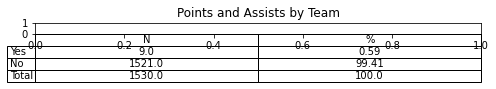

In [680]:
# import matplotlib.pyplot as plt

#initialize figure
fig = plt.figure(figsize = (8, .2))
ax = fig.add_subplot(111)

#create table
ax.table(cellText = ds.values, rowLabels = ds.index, 
         colLabels = ds.columns, cellLoc='center')

#add title to table
ax.set_title('Points and Assists by Team')
ax.to_csv("hello.csv",sep='\t', header=None, mode='a')
#turn axes off
ax.axis('off')

In [720]:

k=1
select_cols=['q221i_%s'%k,'q221a_%s'%k,'q221g_%s'%k,'q220f_%s'%k,'q221f_%s'%k,'q221d_%s'%k,'q216c_%s'%k,'q209a','q209b','q211a_%s'%k,'q215_%s'%k,'q220d_%s'%k,'q220a_%s'%k,'q220g_%s'%k,'q211c_%s'%k,'q220i_%s'%k,'q224_%s'%k,'resp_select'] 

df_ce_withdrawal=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]
v="withdrawal"
ce=gen_df(df_ce_withdrawal)
replaceables(ce)
writer = pd.ExcelWriter(excel_dir()+f"withdrawal_consistent{date_today}.xlsx", engine='xlsxwriter')
ce.to_excel(writer,sheet_name = 'Consistent User', index=False)
l=["Consistent User"]
for i in l:
    worksheet2 = writer.sheets[i]
    data_format3 = workbook.add_format({'bg_color': '#b8fcff','bold':True,'text_wrap': True,'border':1})
    # data_format2 = workbook.add_format({'align': 'right'})
    worksheet2.set_row(0,cell_format=data_format3)
    worksheet2.set_column('A:Z',15)

In [695]:
k=2
df_ce_rhythm=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]

In [696]:
k=7
df_ce_lam=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]

In [697]:
k=8
df_ce_nonlam=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]

In [698]:
k=3
df_ce_countingplus=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]

In [699]:
k=9
df_ce_standard_days=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]

In [700]:
k=5
df_ce_herbs=r[(r[f'strat_combine{k}']==1) #used index throughout the last 2-6 months
            # & ((r[f'q220']==k)&(r[f'q221'].isna()))  
            # &
            # (r[f'q220g_{k}']==0)
            # &
            # ((r[f'q220a_{k}']==1)|(r[f'q220a_{k}']==2)) 
            &
            ((r[f'q220']==k)&(r[f'q221'].isna())&(r[f'q222'].isna())&(r[f'q223'].isna())) #respondent only used one strategy and no other
            &
            ((r[f'q220d_{k}']==1) | (r[f'q221d_{k}']==1)| (r[f'q222d_{k}']==1)| (r[f'q223d_{k}']==1))

           ][select_cols]

STRATEGY 1

In [718]:
k=1
select_cols=['q221i_%s'%k,'q221a_%s'%k,'q221g_%s'%k,'q220f_%s'%k,'q221f_%s'%k,'q221d_%s'%k,'q216c_%s'%k,'q209a','q209b','q211a_%s'%k,'q215_%s'%k,'q220d_%s'%k,'q220a_%s'%k,'q220g_%s'%k,'q211c_%s'%k,'q220i_%s'%k,'q224_%s'%k,'resp_select'] 

v="withdrawal"
ce=gen_df(df_ce_withdrawal)
replaceables(ce)
writer = pd.ExcelWriter(excel_dir()+f"withdrawal_consistent{date_today}.xlsx", engine='xlsxwriter')
ce.to_excel(writer,sheet_name = 'Consistent User', index=False)
l=["Consistent User"]
for i in l:
    worksheet2 = writer.sheets[i]
    data_format3 = workbook.add_format({'bg_color': '#b8fcff','bold':True,'text_wrap': True,'border':1})
    # data_format2 = workbook.add_format({'align': 'right'})
    worksheet2.set_row(0,cell_format=data_format3)
    worksheet2.set_column('A:Z',15)

ValueError: Data must be 1-dimensional

In [714]:
df_ce_lam

,q221i_2,q221a_2,q221g_2,q220f_2,q221f_2,q223d_2,q216c_2,q209a,q209b,q211a_2,q215_2,q220a_2,q220g_2,q211c_2,q220i_2,q224_2,resp_select,q220,q221,q222,q223,q220d_2,q220d_1,q220d_5,q220d_12,q220d_13,q220d_14,q220d_15,q220d_16,q220d_17,q220d_18,q220d_19,q220d_20,q221d_2,q221d_1,q221d_5,q221d_12,q221d_13,q221d_14,q221d_15,q221d_16,q221d_17,q221d_18,q221d_19,q221d_20,q222d_2,q222d_1,q222d_5,q222d_12,q222d_13,q222d_14,q222d_15,q222d_16,q222d_17,q222d_18,q222d_19,q222d_20,q223d_1,q223d_5,q223d_12,q223d_13,q223d_14,q223d_15,q223d_16,q223d_17,q223d_18,q223d_19,q223d_20
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,0.0,NaN,0.0,AD3304301-F2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,NaN,NaN,0.0,NaN,0.0,AD2801101-F2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0,0,NaN,NaN,0.0,NaN,0.0,AD0203502-F2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,0.0,NaN,0.0,AD3303501-F2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1165,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0,0,NaN,NaN,0.0,NaN,0.0,AD0600601-F2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:

variables220=[]
question='220'
for k in range(1,29):
    _=r[(r[f'q{question}']==k) &

    (


try:
	(r[f'q{question}h_{k}1']==1)&()
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}2']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}3']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}4']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}5']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}6']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}7']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}8']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}9']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}10']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}11']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}12']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}13']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}14']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}15']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}16']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}17']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}18']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}19']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}20']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}21']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}22']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}23']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}24']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}25']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}26']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}27']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}28']==1)
except(KeyError):
	continue


          )



         ][['q220h_1','q220h_2','q220h_3','q220h_4','q220h_5','q220h_6','q220h_7','q220h_8','q220h_9','q220h_10','q220h_11','q220h_12','q220h_13','q220h_14','q220h_15','q220h_16','q220h_17','q220h_18','q220h_19','q220h_20','q220h_21','q220h_22','q220h_23','q220h_24','q220h_25','q220h_26','q220h_27','q220h_28']]
    variables223.append(_)

SyntaxError: invalid syntax (1182364503.py, line 9)

In [305]:
i='k'

for p in range(1,29):
    print("\n|\n\ntry:\n\t(r[f'q{question}h_{%s}%s']==1)\nexcept(KeyError):\n\tcontinue\n\n"%(i,p))


|

try:
	(r[f'q{question}h_{k}1']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}2']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}3']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}4']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}5']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}6']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}7']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}8']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}9']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}10']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}11']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}12']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}13']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{k}14']==1)
except(KeyError):
	continue



|

try:
	(r[f'q{question}h_{

In [199]:
variables220

[Series([], Name: q220h_1, dtype: object),
 Series([], Name: q220h_2, dtype: object),
 250      1.0
 645     15.0
 909      5.0
 1360    14.0
 1430     7.0
 1507    14.0
 Name: q220h_3, dtype: float64,
 440    1.0
 Name: q220h_4, dtype: float64,
 520    1.0
 Name: q220h_5, dtype: float64,
 Series([], Name: q220h_6, dtype: float64),
 Series([], Name: q220h_7, dtype: float64),
 951     14.0
 1141     6.0
 1186    24.0
 1496     1.0
 Name: q220h_8, dtype: float64,
 81      2.0
 233    16.0
 Name: q220h_9, dtype: float64,
 Series([], Name: q220h_10, dtype: float64),
 Series([], Name: q220h_11, dtype: float64),
 Series([], Name: q220h_12, dtype: int8),
 Series([], Name: q220h_13, dtype: int8),
 Series([], Name: q220h_14, dtype: int8),
 Series([], Name: q220h_15, dtype: int8),
 Series([], Name: q220h_16, dtype: int8),
 Series([], Name: q220h_17, dtype: int8),
 Series([], Name: q220h_18, dtype: int8),
 Series([], Name: q220h_19, dtype: int8),
 Series([], Name: q220h_20, dtype: float64),
 Seri

In [166]:
withdrawal

,starttime,endtime,deviceid,devicephonenum,today,level1,level2_cal,level2,level3_cal,level3,level4,your_name,name_yesno,name_typed,tday,date_yesno,manual_date,todaynow,structure_n,structure,hhid,hhid_select,hhid_cal,consent,respondent_sign,res_id,resp_select,res_name,ward,hh_name,q12,q13,head_check,q101,q102,ageyr,agegreater,q105,q106,q106_cal,q106b,q107,q108,q109,q201,q202,q202a,q202b,q202c,q202e,q203,q204,q205,q206,q206_1,q206_2,q206_3,q206_4,q206_5,q206_6,q206_9,q206_10,q206_11,q206_12,q206_13,q206_14,q206_15,q206_16,q206_17,q206_18,q206_19,q206_20,q206_21,q206_22,q206_23,q206_24,q206_25,q206_26,q206_27,q206_28,q206_29,q207,q208,q208b,q208c,q209a,q209b,q210,q211a,q211a_1,q211a_2,q211a_3,q211a_4,q211a_5,q211a_6,q211a_7,q211a_8,q211a_9,q211a_10,q211a_11,q211a_12,q211a_13,q211a_14,q211a_15,q211a_16,q211a_17,q211a_18,q211a_19,q211a_20,q211a_21,q211a_22,q211a_23,q211a_24,q211a_25,q211a_26,q211a_27,q211a_28,q211a_96,q211a_cal1,q211a_cal2,q211a_cal3,q211a_cal4,q211a_cal5,q211a_cal6,q211a_cal7,q211a_cal8,q211a_cal9,q211a_cal10,q211a_cal11,q211a_cal12,q211a_cal13,q211a_cal14,q211a_cal15,q211a_cal16,q211a_cal17,q211a_cal18,q211a_cal19,q211a_cal20,q211a_cal21,q211a_cal22,q211a_cal23,q211a_cal24,q211a_cal25,q211a_cal26,q211a_cal27,q211a_cal28,q211a_cal,q211c,q211c_1,q211c_2,q211c_3,q211c_4,q211c_5,q211c_6,q211c_7,q211c_8,q211c_9,q211c_10,q211c_11,q211c_12,q211c_13,q211c_14,q211c_15,q211c_16,q211c_17,q211c_18,q211c_19,q211c_20,q211c_21,q211c_22,q211c_23,q211c_24,q211c_25,q211c_26,q211c_27,q211c_28,q211c_cal1,q211c_cal2,q211c_cal3,q211c_cal4,q211c_cal5,q211c_cal6,q211c_cal7,q211c_cal8,q211c_cal9,q211c_cal10,q211c_cal11,q211c_cal12,q211c_cal13,q211c_cal14,q211c_cal15,q211c_cal16,q211c_cal17,q211c_cal18,q211c_cal19,q211c_cal20,q211c_cal21,q211c_cal22,q211c_cal23,q211c_cal24,q211c_cal25,q211c_cal26,q211c_cal27,q211c_cal28,q211c_cal,q211a_c_count,q211_cal1,q211_cal2,q211_cal3,q211_cal4,q211_cal5,q211_cal6,q211_cal7,q211_cal8,q211_cal9,q211_cal10,q211_cal11,q211_cal12,q211_cal13,q211_cal14,q211_cal15,q211_cal16,q211_cal17,q211_cal18,q211_cal19,q211_cal20,q211_cal21,q211_cal22,q211_cal23,q211_cal24,q211_cal25,q211_cal26,q211_cal27,q211_cal28,q211_strategy1,q211_strategy2,q211_strategy3,q211_strategy4,q211_strategy5,q211_strategy6,q211_strategy7,q211_strategy8,q211_strategy9,q211_strategy10,q211_strategy11,q211_strategy12,q211_strategy13,q211_strategy14,q211_strategy15,q211_strategy16,q211_strategy17,q211_strategy18,q211_strategy19,q211_strategy20,q211_strategy21,q211_strategy22,q211_strategy23,q211_strategy24,q211_strategy25,q211_strategy26,q211_strategy27,q211_strategy28,confirm_a,q213a_1,q213a_11,q213a_12,q213a_13,q213a_14,q213a_15,q213a_16,q213a_17,q213a_18,q213a_19,q213a_110,q213a_197,q213a_196,q213c_1,q213a_2,q213a_21,q213a_22,q213a_23,q213a_24,q213a_25,q213a_26,q213a_27,q213a_28,q213a_29,q213a_210,q213a_297,q213a_296,q213c_2,q213a_3,q213a_31,q213a_32,q213a_33,q213a_34,q213a_35,q213a_36,q213a_37,q213a_38,q213a_39,q213a_310,q213a_397,q213a_396,q213b_3,q213b_31,q213b_32,q213b_33,q213b_34,q213b_35,q213b_36,q213b_37,q213b_38,q213b_39,q213b_310,q213b_311,q213b_312,q213b_313,q213b_396,q213c_3,q213a_4,q213a_41,q213a_42,q213a_43,q213a_44,q213a_45,q213a_46,q213a_47,q213a_48,q213a_49,q213a_410,q213a_497,q213a_496,q213b_4,q213b_41,q213b_42,q213b_43,q213b_44,q213b_45,q213b_46,q213b_47,q213b_48,q213b_49,q213b_410,q213b_411,q213b_412,q213b_413,q213b_496,q213c_4,q213a_5,q213a_51,q213a_52,q213a_53,q213a_54,q213a_55,q213a_56,q213a_57,q213a_58,q213a_59,q213a_510,q213a_597,q213a_596,q213b_5,q213b_51,q213b_52,q213b_53,q213b_54,q213b_55,q213b_56,q213b_57,q213b_58,q213b_59,q213b_510,q213b_511,q213b_512,q213b_513,q213b_596,q213c_5,q213a_6,q213a_61,q213a_62,q213a_63,q213a_64,q213a_65,q213a_66,q213a_67,q213a_68,q213a_69,q213a_610,q213a_697,q213a_696,q213b_6,q213b_61,q213b_62,q213b_63,q213b_64,q213b_65,q213b_66,q213b_67,q213b_68,q213b_69,q213b_610,q213b_611,q213b_612,q213b_613,q213b_696,q213c_6,q213a_7,q213a_71,q213a_72,q213a_73,q213a_74,q213a_75,q213a_76,q213a_77

In [177]:
variables[0]

Series([], Name: q220h_1, dtype: object)

In [173]:
variables[1]

,starttime,endtime,deviceid,devicephonenum,today,level1,level2_cal,level2,level3_cal,level3,level4,your_name,name_yesno,name_typed,tday,date_yesno,manual_date,todaynow,structure_n,structure,hhid,hhid_select,hhid_cal,consent,respondent_sign,res_id,resp_select,res_name,ward,hh_name,q12,q13,head_check,q101,q102,ageyr,agegreater,q105,q106,q106_cal,q106b,q107,q108,q109,q201,q202,q202a,q202b,q202c,q202e,q203,q204,q205,q206,q206_1,q206_2,q206_3,q206_4,q206_5,q206_6,q206_9,q206_10,q206_11,q206_12,q206_13,q206_14,q206_15,q206_16,q206_17,q206_18,q206_19,q206_20,q206_21,q206_22,q206_23,q206_24,q206_25,q206_26,q206_27,q206_28,q206_29,q207,q208,q208b,q208c,q209a,q209b,q210,q211a,q211a_1,q211a_2,q211a_3,q211a_4,q211a_5,q211a_6,q211a_7,q211a_8,q211a_9,q211a_10,q211a_11,q211a_12,q211a_13,q211a_14,q211a_15,q211a_16,q211a_17,q211a_18,q211a_19,q211a_20,q211a_21,q211a_22,q211a_23,q211a_24,q211a_25,q211a_26,q211a_27,q211a_28,q211a_96,q211a_cal1,q211a_cal2,q211a_cal3,q211a_cal4,q211a_cal5,q211a_cal6,q211a_cal7,q211a_cal8,q211a_cal9,q211a_cal10,q211a_cal11,q211a_cal12,q211a_cal13,q211a_cal14,q211a_cal15,q211a_cal16,q211a_cal17,q211a_cal18,q211a_cal19,q211a_cal20,q211a_cal21,q211a_cal22,q211a_cal23,q211a_cal24,q211a_cal25,q211a_cal26,q211a_cal27,q211a_cal28,q211a_cal,q211c,q211c_1,q211c_2,q211c_3,q211c_4,q211c_5,q211c_6,q211c_7,q211c_8,q211c_9,q211c_10,q211c_11,q211c_12,q211c_13,q211c_14,q211c_15,q211c_16,q211c_17,q211c_18,q211c_19,q211c_20,q211c_21,q211c_22,q211c_23,q211c_24,q211c_25,q211c_26,q211c_27,q211c_28,q211c_cal1,q211c_cal2,q211c_cal3,q211c_cal4,q211c_cal5,q211c_cal6,q211c_cal7,q211c_cal8,q211c_cal9,q211c_cal10,q211c_cal11,q211c_cal12,q211c_cal13,q211c_cal14,q211c_cal15,q211c_cal16,q211c_cal17,q211c_cal18,q211c_cal19,q211c_cal20,q211c_cal21,q211c_cal22,q211c_cal23,q211c_cal24,q211c_cal25,q211c_cal26,q211c_cal27,q211c_cal28,q211c_cal,q211a_c_count,q211_cal1,q211_cal2,q211_cal3,q211_cal4,q211_cal5,q211_cal6,q211_cal7,q211_cal8,q211_cal9,q211_cal10,q211_cal11,q211_cal12,q211_cal13,q211_cal14,q211_cal15,q211_cal16,q211_cal17,q211_cal18,q211_cal19,q211_cal20,q211_cal21,q211_cal22,q211_cal23,q211_cal24,q211_cal25,q211_cal26,q211_cal27,q211_cal28,q211_strategy1,q211_strategy2,q211_strategy3,q211_strategy4,q211_strategy5,q211_strategy6,q211_strategy7,q211_strategy8,q211_strategy9,q211_strategy10,q211_strategy11,q211_strategy12,q211_strategy13,q211_strategy14,q211_strategy15,q211_strategy16,q211_strategy17,q211_strategy18,q211_strategy19,q211_strategy20,q211_strategy21,q211_strategy22,q211_strategy23,q211_strategy24,q211_strategy25,q211_strategy26,q211_strategy27,q211_strategy28,confirm_a,q213a_1,q213a_11,q213a_12,q213a_13,q213a_14,q213a_15,q213a_16,q213a_17,q213a_18,q213a_19,q213a_110,q213a_197,q213a_196,q213c_1,q213a_2,q213a_21,q213a_22,q213a_23,q213a_24,q213a_25,q213a_26,q213a_27,q213a_28,q213a_29,q213a_210,q213a_297,q213a_296,q213c_2,q213a_3,q213a_31,q213a_32,q213a_33,q213a_34,q213a_35,q213a_36,q213a_37,q213a_38,q213a_39,q213a_310,q213a_397,q213a_396,q213b_3,q213b_31,q213b_32,q213b_33,q213b_34,q213b_35,q213b_36,q213b_37,q213b_38,q213b_39,q213b_310,q213b_311,q213b_312,q213b_313,q213b_396,q213c_3,q213a_4,q213a_41,q213a_42,q213a_43,q213a_44,q213a_45,q213a_46,q213a_47,q213a_48,q213a_49,q213a_410,q213a_497,q213a_496,q213b_4,q213b_41,q213b_42,q213b_43,q213b_44,q213b_45,q213b_46,q213b_47,q213b_48,q213b_49,q213b_410,q213b_411,q213b_412,q213b_413,q213b_496,q213c_4,q213a_5,q213a_51,q213a_52,q213a_53,q213a_54,q213a_55,q213a_56,q213a_57,q213a_58,q213a_59,q213a_510,q213a_597,q213a_596,q213b_5,q213b_51,q213b_52,q213b_53,q213b_54,q213b_55,q213b_56,q213b_57,q213b_58,q213b_59,q213b_510,q213b_511,q213b_512,q213b_513,q213b_596,q213c_5,q213a_6,q213a_61,q213a_62,q213a_63,q213a_64,q213a_65,q213a_66,q213a_67,q213a_68,q213a_69,q213a_610,q213a_697,q213a_696,q213b_6,q213b_61,q213b_62,q213b_63,q213b_64,q213b_65,q213b_66,q213b_67,q213b_68,q213b_69,q213b_610,q213b_611,q213b_612,q213b_613,q213b_696,q213c_6,q213a_7,q213a_71,q213a_72,q213a_73,q213a_74,q213a_75,q213a_76,q213a_77

In [180]:
len(variables[2])

6

In [203]:
for i in variables223:
    if len(i)>0:
        print(i)

909    NaN
1495   NaN
Name: q220h_4, dtype: float64


In [260]:
variables220[2]

,q220h_1,q220h_2,q220h_3,q220h_4,q220h_5,q220h_6,q220h_7,q220h_8,q220h_9,q220h_10,q220h_11,q220h_12,q220h_13,q220h_14,q220h_15,q220h_16,q220h_17,q220h_18,q220h_19,q220h_20,q220h_21,q220h_22,q220h_23,q220h_24,q220h_25,q220h_26,q220h_27,q220h_28
250,,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,,0,0,0,0,0,0
645,,,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,,0,0,0,0,0,0
909,,,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,,0,0,0,0,0,0
1360,,,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,,0,0,0,0,0,0
1430,,,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,,0,0,0,0,0,0
1507,,,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,,0,0,0,0,0,0


In [232]:
r['q221'].value_counts(dropna=False)

NaN     1403
1.0       18
14.0      15
7.0       12
16.0      10
17.0       9
15.0       9
8.0        8
3.0        8
12.0       7
2.0        6
5.0        4
23.0       4
24.0       4
4.0        4
21.0       4
22.0       2
26.0       2
6.0        1
Name: q221, dtype: int64

In [250]:
for i in range(1,29):
    print(f"'q220h_{i}'",end=",")

'q220h_1','q220h_2','q220h_3','q220h_4','q220h_5','q220h_6','q220h_7','q220h_8','q220h_9','q220h_10','q220h_11','q220h_12','q220h_13','q220h_14','q220h_15','q220h_16','q220h_17','q220h_18','q220h_19','q220h_20','q220h_21','q220h_22','q220h_23','q220h_24','q220h_25','q220h_26','q220h_27','q220h_28',

In [264]:
r['q220h_1'].value_counts()

       1522
3         2
2         2
14        1
2 3       1
17        1
15        1
Name: q220h_1, dtype: int64

In [323]:
q220h_1_1=[]
for i in r['q220h_4']:
    if str(r['q220h_3'].dtype)=='float64':
        print(i)
    else:
        if (len(i)>0):
            print(i)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [285]:
r['q220h_129'].value_counts()

0    1530
Name: q220h_129, dtype: int64

In [286]:
for i in r.columns:
    if 'q220h' in i:
        print(i)

q220h_1
q220h_12
q220h_13
q220h_14
q220h_15
q220h_16
q220h_17
q220h_18
q220h_19
q220h_110
q220h_111
q220h_112
q220h_113
q220h_114
q220h_115
q220h_116
q220h_117
q220h_118
q220h_119
q220h_120
q220h_121
q220h_122
q220h_123
q220h_124
q220h_125
q220h_126
q220h_127
q220h_128
q220h_2
q220h_21
q220h_23
q220h_24
q220h_25
q220h_26
q220h_27
q220h_28
q220h_29
q220h_210
q220h_211
q220h_212
q220h_213
q220h_214
q220h_215
q220h_216
q220h_217
q220h_218
q220h_219
q220h_220
q220h_221
q220h_222
q220h_223
q220h_224
q220h_225
q220h_226
q220h_227
q220h_228
q220h_3
q220h_31
q220h_32
q220h_34
q220h_35
q220h_36
q220h_37
q220h_38
q220h_39
q220h_310
q220h_311
q220h_312
q220h_313
q220h_314
q220h_315
q220h_316
q220h_317
q220h_318
q220h_319
q220h_320
q220h_321
q220h_322
q220h_323
q220h_324
q220h_325
q220h_326
q220h_327
q220h_328
q220h_4
q220h_41
q220h_42
q220h_43
q220h_45
q220h_46
q220h_47
q220h_48
q220h_49
q220h_410
q220h_411
q220h_412
q220h_413
q220h_414
q220h_415
q220h_416
q220h_417
q220h_418
q220h_419
q220h_420


In [302]:
v=9
try:h=v+"dedede";print(h)
except(TypeError):print("he's not your type!");

he's not your type!


In [316]:
str(r['q220h_3'].dtype)

'float64'

In [330]:
r['q220h_71'].value_counts()

0    1529
1       1
Name: q220h_71, dtype: int64

In [307]:
r[('q211a_1' in r.columns)]

KeyError: True

In [451]:
for i in [1,2,4,5,7,8]:
    for j in [1,2,4,5,7,8,9,12,13,14,15,16,17,18,19,20]:
        question="220"
        try:
            # print(r[f'q220h_{i}{j}'].value_counts(dropna=False))
            _=r[(r[f'q{question}h_{i}{j}']==1)&(((r[f'q{question}i_{i}']==1)|(r[f'q{question}i_{i}']==2)|(r[f'q{question}i_{i}']==3)) & ((r[f'q211_cal{i}']==1)&(r[f'q216_cal{i}']==1))]['resp_select']
            if _.size>0:
                print(f"strategy:{i} + Strategy:{j}")
                print(_)
        except(KeyError):
            continue

strategy:7 + Strategy:1
135    AD3000901-F2
Name: resp_select, dtype: object
strategy:7 + Strategy:12
135    AD3000901-F2
Name: resp_select, dtype: object
strategy:7 + Strategy:16
1379    AD3305601-F2
Name: resp_select, dtype: object


In [425]:
r.iloc[2]

starttime                               Oct 16, 2022 12:51:23 PM
endtime                                  Oct 16, 2022 1:03:21 PM
deviceid                                collect:wevRFxY3WMeIBMLA
devicephonenum                                               NaN
today                                               Oct 16, 2022
level1                                                         3
level2_cal                                                 State
level2                                                         8
level3_cal                                                   LGA
level3                                                        55
level4                                                      AD06
your_name                                                     72
name_yesno                                                     1
name_typed                                                      
tday                                                         NaN
date_yesno               

In [376]:
x=pd.DataFrame(r.iloc[135])

In [389]:
x.iloc[r.index[212]]

135    1.0
Name: q211_cal7, dtype: object

In [388]:
for i,j in enumerate(r.columns):
    if j=="q211_cal7":
        print(i,j)

212 q211_cal7


In [387]:
x.iloc[r.index[1036]]

135    1.0
Name: q216_cal7, dtype: object

In [401]:
r[r['resp_select']=="AD3000901-F2"][['q211a_7','q211c_7','q215_7','q216c_7']]

,q211a_7,q211c_7,q215_7,q216c_7
135,0,1.0,1,NaN


In [569]:
r.shape

(1530, 10401)

In [627]:
# r['space']=""
# with original constraints
strats={1:'Withdrawal',2:'Abstinence/Rhythm',3:'Counting Plus',
        4:'Concoctions',5:'Herbs',7:'LAM',8:'Non-LAM',
        9: 'Standard Days',12:'Emergency Contraceptive',13:'Female Condom',14:'Male Condom',15:'Pill',16:'Implants',17:'Injectables',18:'IUD',19:'Male Sterilization',20:'Female Sterilization'}
two_digit_strats={12:'Emergency Contraceptive',13:'Female Condom',14:'Male Condom',15:'Pill',16:'Implants',17:'Injectables',18:'IUD',19:'Male Sterilization',20:'Female Sterilization'}
for i in [1,2,3,4,5,7,8]:
    for j in [1,2,3,4,5,7,8,9,12,13,14,15,16,17,18,19,20]:
        question="221"
        c=f'q{question}h_{i}{j}'
        if len(c)>8:
            c=c[-4:]
            if((c[0])=="_")&(int(c[-2:]) in list(two_digit_strats.keys())):
                try:
                    # print(r[f'q220h_{i}{j}'].value_counts(dropna=False))

                    _=r[(r[f'q{question}h_{i}{j}']==1)&(((r[f'q{question}i_{i}']==1)|(r[f'q{question}i_{i}']==2)|(r[f'q{question}i_{i}']==3)) & ((r[f'q211_cal{i}']==1)&(r[f'q216_cal{i}']==1)))][['resp_select','space']]
                    if str(type(_))=="<class 'pandas.core.frame.DataFrame'>":
                        _['strategies']=strats[i] +" + "+ strats[j]
                    if _.size>0:
                        # print(f"strategy:{i} + Strategy:{j}")
                        # _['dsd']=f"{i}+{j}"
                        print(f"strategy:{i} + Strategy:{j}")
                        display(_)
                except(KeyError):
                    continue
        else:
            try:
                    # print(r[f'q220h_{i}{j}'].value_counts(dropna=False))

                    _=r[(r[f'q{question}h_{i}{j}']==1)&(((r[f'q{question}i_{i}']==1)|(r[f'q{question}i_{i}']==2)|(r[f'q{question}i_{i}']==3)) & ((r[f'q211_cal{i}']==1)&(r[f'q216_cal{i}']==1)))][['resp_select','space']]
                    if str(type(_))=="<class 'pandas.core.frame.DataFrame'>":
                        _['strategies']=strats[i] +" + "+ strats[j]
                    if _.size>0:
                        # print(f"strategy:{i} + Strategy:{j}")
                        # _['dsd']=f"{i}+{j}"
                        print(f"strategy:{i} + Strategy:{j}")
                        display(_)
            except(KeyError):
                    continue

strategy:3 + Strategy:1


,resp_select,space,strategies
422,AD3200601-F2,,Counting Plus + Withdrawal


strategy:3 + Strategy:17


,resp_select,space,strategies
179,AD1803401-F2,,Counting Plus + Injectables


In [643]:
# r['space']=""
# 2) those who used strategies in last one month
strats={1:'Withdrawal',2:'Abstinence/Rhythm',3:'Counting Plus',
        4:'Concoctions',5:'Herbs',7:'LAM',8:'Non-LAM',
        9: 'Standard Days',12:'Emergency Contraceptive',13:'Female Condom',14:'Male Condom',15:'Pill',16:'Implants',17:'Injectables',18:'IUD',19:'Male Sterilization',20:'Female Sterilization'}
two_digit_strats={12:'Emergency Contraceptive',13:'Female Condom',14:'Male Condom',15:'Pill',16:'Implants',17:'Injectables',18:'IUD',19:'Male Sterilization',20:'Female Sterilization'}
for i in [1,2,3,4,5,7,8]:
    for j in [1,2,3,4,5,7,8,9,12,13,14,15,16,17,18,19,20]:
        question="223"
        c=f'q{question}h_{i}{j}'
        if len(c)>8:
            c=c[-4:]
            if((c[0])=="_")&(int(c[-2:]) in list(two_digit_strats.keys())):
                try:
                    # print(r[f'q220h_{i}{j}'].value_counts(dropna=False))

                    _=r[(r[f'q{question}h_{i}{j}']==1)&(((r[f'q{question}i_{i}']==1)|(r[f'q{question}i_{i}']==2)|(r[f'q{question}i_{i}']==3)) & ((r[f'q211_cal{i}']==1)&(r[f'q216_cal{i}']==1)))][['resp_select',f'q211a_{i}',f'q211c_{i}',f'q209a',f'q209b',f'q215_{i}',f'q216c_{i}']]
                    if str(type(_))=="<class 'pandas.core.frame.DataFrame'>":
                        _['strategies']=strats[i] +" + "+ strats[j]
                    if _.size>0:
                        # print(f"strategy:{i} + Strategy:{j}")
                        # _['dsd']=f"{i}+{j}"
                        # print(f"strategy:{i} + Strategy:{j}")
                        display(_)
                except(KeyError):
                    continue
        else:
            try:
                    # print(r[f'q220h_{i}{j}'].value_counts(dropna=False))

                    _=r[(r[f'q{question}h_{i}{j}']==1)&(((r[f'q{question}i_{i}']==1)|(r[f'q{question}i_{i}']==2)|(r[f'q{question}i_{i}']==3)) & ((r[f'q211_cal{i}']==1)&(r[f'q216_cal{i}']==1)))][['resp_select',f'q211a_{i}',f'q211c_{i}',f'q209a',f'q209b',f'q215_{i}',f'q216c_{i}']]
                    if str(type(_))=="<class 'pandas.core.frame.DataFrame'>":
                        _['strategies']=strats[i] +" + "+ strats[j]
                        
                    if _.size>0:
                        # print(f"strategy:{i} + Strategy:{j}")
                        # _['dsd']=f"{i}+{j}"
                        # print(f"strategy:{i} + Strategy:{j}")
                        display(_)
            except(KeyError):
                    continue

,resp_select,q211a_4,q211c_4,q209a,q209b,q215_4,q216c_4,strategies
909,AD1000901-F2,0,1.0,1.0,1.0,1,NaN,Concoctions + Herbs


In [551]:
for i in r.columns:
    if (len(i)==9)&(('q220h_1' in i)|('q220h_2' in i)|('q220h_3' in i)|('q220h_4' in i)|('q220h_5' in i)|('q220h_7' in i)|('q220h_8' in i)):
        print(i)

q220h_110
q220h_111
q220h_112
q220h_113
q220h_114
q220h_115
q220h_116
q220h_117
q220h_118
q220h_119
q220h_120
q220h_121
q220h_122
q220h_123
q220h_124
q220h_125
q220h_126
q220h_127
q220h_128
q220h_210
q220h_211
q220h_212
q220h_213
q220h_214
q220h_215
q220h_216
q220h_217
q220h_218
q220h_219
q220h_220
q220h_221
q220h_222
q220h_223
q220h_224
q220h_225
q220h_226
q220h_227
q220h_228
q220h_310
q220h_311
q220h_312
q220h_313
q220h_314
q220h_315
q220h_316
q220h_317
q220h_318
q220h_319
q220h_320
q220h_321
q220h_322
q220h_323
q220h_324
q220h_325
q220h_326
q220h_327
q220h_328
q220h_410
q220h_411
q220h_412
q220h_413
q220h_414
q220h_415
q220h_416
q220h_417
q220h_418
q220h_419
q220h_420
q220h_421
q220h_422
q220h_423
q220h_424
q220h_425
q220h_426
q220h_427
q220h_428
q220h_510
q220h_511
q220h_512
q220h_513
q220h_514
q220h_515
q220h_516
q220h_517
q220h_518
q220h_519
q220h_520
q220h_521
q220h_522
q220h_523
q220h_524
q220h_525
q220h_526
q220h_527
q220h_528
q220h_710
q220h_711
q220h_712
q220h_713
q220h_714


In [570]:
r[r['q220h_317']==1]['resp_select']

Series([], Name: resp_select, dtype: object)

In [629]:
b=r.iloc[179]
b=pd.DataFrame(b)
b=b.T
b['q221h_317']

179    1
Name: q221h_317, dtype: object

In [605]:
c="q220h_123"
c=c[-4:]
if((c[0])=="_")&(two_digit_strats[int(c[-2:])]):
    print(good)
else:
    
    

SyntaxError: 'continue' not properly in loop (610871910.py, line 6)

In [600]:
'_' in c

True

In [610]:
list(two_digit_strats.keys())

[12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
#stopper
for i in [1,2,3,4,5,7,8]:
    print(i,strats[i])
    c=r[((r[f'q220d_{i}']==0)|(r[f'q221d_{i}']==0)|(r[f'q222d_{i}']==0)|(r[f'q223d_{i}']==0))&(r[f'q216_cal{i}']==1)&((r[f'q220f_{i}']==0)|(r[f'q221f_{i}']==0)|(r[f'q222f_{i}']==0)|(r[f'q223f_{i}']==0))][['resp_select',f'q216_cal{i}',f'q220d_{i}',f'q221d_{i}',f'q222d_{i}',f'q223d_{i}',f'q220f_{i}',f'q221f_{i}',f'q222f_{i}',f'q223f_{i}','q220','q221','q222','q223']]
    display(c)

1 Withdrawal


,resp_select,q216_cal1,q220d_1,q221d_1,q222d_1,q223d_1,q220f_1,q221f_1,q222f_1,q223f_1,q220,q221,q222,q223
116,AD0205001-F2,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,14.0,1.0,NaN,NaN
796,AD1604101-F2,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,17.0,1.0,NaN,NaN
1365,AD1000701-F2,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,21.0,1.0,6.0,8.0


2 Abstinence/Rhythm


,resp_select,q216_cal2,q220d_2,q221d_2,q222d_2,q223d_2,q220f_2,q221f_2,q222f_2,q223f_2,q220,q221,q222,q223


3 Counting Plus


,resp_select,q216_cal3,q220d_3,q221d_3,q222d_3,q223d_3,q220f_3,q221f_3,q222f_3,q223f_3,q220,q221,q222,q223


4 Concoctions


,resp_select,q216_cal4,q220d_4,q221d_4,q222d_4,q223d_4,q220f_4,q221f_4,q222f_4,q223f_4,q220,q221,q222,q223
58,AD1404901-F2,1.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
740,AD0603701-F2,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,16.0,4.0,NaN,NaN


5 Herbs


In [655]:
j='i'
for i in range(5):
    print("f'q22%sd_{%s}'"%(i,j),end=",")
    # print(i,end=",")

f'q220d_{i}',f'q221d_{i}',f'q222d_{i}',f'q223d_{i}',f'q224d_{i}',

In [664]:
#switchers
for i in [1,2,3,4,5,7,8]:
    print(i,strats[i])
    c=r[((r[f'q220d_{i}']==0)|(r[f'q221d_{i}']==0)|(r[f'q222d_{i}']==0)|(r[f'q223d_{i}']==0))&(r[f'q216_cal{i}']==1)&((r[f'q220f_{i}']==1)|(r[f'q221f_{i}']==1)|(r[f'q222f_{i}']==1)|(r[f'q223f_{i}']==1))][['resp_select',f'q216_cal{i}',f'q220d_{i}',f'q221d_{i}',f'q222d_{i}',f'q223d_{i}',f'q220f_{i}',f'q221f_{i}',f'q222f_{i}',f'q223f_{i}','q220','q221','q222','q223']]
    display(c)

1 Withdrawal


,resp_select,q216_cal1,q220d_1,q221d_1,q222d_1,q223d_1,q220f_1,q221f_1,q222f_1,q223f_1,q220,q221,q222,q223
1034,AD1803801-F2,1.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,17.0,1.0,21.0,23.0
1062,AD0303801-F2,1.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,15.0,1.0,NaN,NaN


2 Abstinence/Rhythm


,resp_select,q216_cal2,q220d_2,q221d_2,q222d_2,q223d_2,q220f_2,q221f_2,q222f_2,q223f_2,q220,q221,q222,q223


3 Counting Plus


,resp_select,q216_cal3,q220d_3,q221d_3,q222d_3,q223d_3,q220f_3,q221f_3,q222f_3,q223f_3,q220,q221,q222,q223
257,AD2506801-F2,1.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0,3.0,NaN,NaN
409,AD2801201-F2,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,17.0,12.0,4.0,3.0


4 Concoctions


,resp_select,q216_cal4,q220d_4,q221d_4,q222d_4,q223d_4,q220f_4,q221f_4,q222f_4,q223f_4,q220,q221,q222,q223
135,AD3000901-F2,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,7.0,12.0,1.0,4.0


5 Herbs


,resp_select,q216_cal5,q220d_5,q221d_5,q222d_5,q223d_5,q220f_5,q221f_5,q222f_5,q223f_5,q220,q221,q222,q223


7 LAM


,resp_select,q216_cal7,q220d_7,q221d_7,q222d_7,q223d_7,q220f_7,q221f_7,q222f_7,q223f_7,q220,q221,q222,q223


8 Non-LAM


,resp_select,q216_cal8,q220d_8,q221d_8,q222d_8,q223d_8,q220f_8,q221f_8,q222f_8,q223f_8,q220,q221,q222,q223
406,AD2802102-F2,1.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,17.0,15.0,8.0,NaN
881,AD2500201-F2,1.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,17.0,8.0,NaN,NaN
